<font size="8">Analysis of the Red Wine Quality Dataset</font>

# Introduction

This project relies on data loaded from Kaggle dataset (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). To get a better feel of data and find useful patterns Pandas, visualizing data with Matplotlib & Seaborn will be performed. Subsequently, the creation of linear regression models will be executed utilizing the capabilities of both the statsmodels and sklearn packages.

## Objectives

The main purpose of the forthcoming analysis will be to understand wine properties, how they relate to each other, and their influence on wine quality and alcohol level. Insights and predictions will be gained by applying various data analysis techniques and machine learning models to the provided dataset.

During the analysis, the primary focus will include:
1. **Determining Relationships and Correlations**:
* The available data will be explored to uncover relationships and correlations among different features.
* Patterns and dependencies will be identified, contributing to a deeper understanding of the wine production process.
2. **Predicting Alcohol and Quality Features**:
* Various predictive modeling techniques will be employed to accurately estimate alcohol content and quality based on the available data.
* To iterate and refine models to achieve the highest prediction accuracy, which will inform and enhance decision-making processes in wine production quality control.
3. **Summarizing Results and Generating Business Value**:
* The analysis outcomes will be compiled into a comprehensive summary that details key findings and model performances.
* Insights will be contextualized to provide actionable recommendations aimed at enhancing production efficiency.

## Exploratory Data Analysis Methodology Overview

The steps and procedures that will be included in the analysis of this document are:

* **Data Loading and Preprocessing:** The first phase involves loading the data using Pandas. Any required data preprocessing steps, such as handling missing values and data type conversions, will be performed during this stage.
  
* **Exploratory Data Analysis (EDA):** A comprehensive EDA will be conducted to gain insights into the dataset. This includes generating statistical summaries, creating visualizations, identifying outliers, and exploring relationships between variables. Correlations, patterns, and trends within the data will be examined to inform subsequent analysis steps.
  
* **Statistical Inference:** Statistical inference will be employed to make meaningful conclusions about the population based on the sample data. This will involve formulating hypotheses, constructing confidence intervals, and conducting hypothesis tests using z tests, t tests as appropriate.

* **Model Selection:** Linear machine learning models will be applied to predict the alcohol and quality column. This will include an analysis of model selection, incorporating an evaluation of preprocessing data for optimal results, and using statistical significance of each feature, R-squared, and other prevalent information criteria for comprehensive assessment.
    
* **Interpretation and Conclusion:** The analysis findings will be interpreted in the context of the research objectives. Limitations of the analysis will be acknowledged, and conclusions will be drawn based on the results obtained.

* **Google Data Studio Dashboard:** A Google Data Studio dashboard will be designed to present the analysis results visually. The dashboard will include at least three types of charts that effectively convey key findings and insights from the analysis.

# Exploratory Data Analysis

## Data Description and Context

Based on the information provided by the author, the database includes information about both the physical and chemical properties of the wine (which serve as **input**) and the sensory characteristics (which act as the **output**). These details collectively describe the wine’s features.

Before starting the analysis of these characteristics and their relationship with each other, a brief overview of what each of them describes is provided bellow: 

1. **Fixed Acidity**:
   - Represents the concentration of non-volatile acids in the wine.
   - These acids are essential for taste and stability.

2. **Volatile Acidity**:
   - Measures the presence of volatile acids (such as acetic acid) in the wine.
   - High levels can lead to an unpleasant vinegar-like taste.

3. **Citric Acid**:
   - Indicates the amount of citric acid in the wine.
   - Adds freshness and a citrus flavor.

4. **Residual Sugar**:
   - Refers to the remaining sugar content after fermentation.
   - Affects the wine's sweetness.

5. **Chlorides**:
   - Measures the concentration of salt (chlorides) in the wine.
   - Influences taste and mouthfeel.

6. **Free Sulfur Dioxide**:
   - Represents the amount of sulfur dioxide (SO₂) that is not bound to other molecules.
   - Acts as a preservative and antioxidant.

7. **Total Sulfur Dioxide**:
   - Combines both free and bound sulfur dioxide.
   - Affects wine stability and shelf life.

8. **Density**:
   - Refers to the density of the wine.
   - Influences mouthfeel and body.

9. **pH**:
   - Measures the acidity or alkalinity of the wine.
   - Affects taste and stability.

10. **Sulphates**:
    - Indicates the concentration of sulfates (SO₄²⁻) in the wine.
    - Enhances aroma and acts as an antimicrobial agent.

11. **Alcohol**:
    - Represents the alcohol content by volume.
    - Influences flavor, body, and overall balance.

12. **Quality (Output Variable)**:
    - A score between 0 and 10, based on sensory evaluations.
    - Reflects overall wine quality, considering taste, aroma, and other characteristics.

## Data Loading and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE

from utils import *

In [2]:
df = pd.read_csv('./winequality-red.csv', sep=',')

Before proceeding with subsequent steps in data processing and analysis, it is ensured that feature names are user-friendly, that there are no duplicate samples or samples with null value in the dataset.

**Note**: _Additional preprocessing will be performed as needed during further analyses._

In [3]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.dropna(inplace=True)

## General Information About the Dataset

In [6]:
print(f'This dataset consists of records for {df.shape[0]} unique wine samples. '
      f'Each recorded sample has {df.shape[1]} different characteristics.')

This dataset consists of records for 1359 unique wine samples. Each recorded sample has 12 different characteristics.


In [7]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

Initially, to gain insights into the distributions, range of values, and potential outliers within the dataset, comprehensive statistical analyses will be used.

In [8]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

The quality feature will be evaluated based on the number of unique values it contains and the distribution of samples for each score.

In [9]:
quality_scores =  ', '.join(map(str, sorted(df['quality'].unique())))
print(f'Quality score values in ascending order are: {quality_scores}.')

Quality score values in ascending order are: 3, 4, 5, 6, 7, 8.


The following table and graph show the distribution of the quality score in the data set.

In [10]:
score_counts = df['quality'].value_counts().sort_index()

quality_score_table = score_counts.to_frame().reset_index()
quality_score_table.columns = ['Quality Score', 'Number of Samples']

quality_score_table.set_index('Quality Score', inplace=True)

quality_score_table

Number of Samples
Quality Score                   
3                             10
4                             53
5                            577
6                            535
7                            167
8                             17

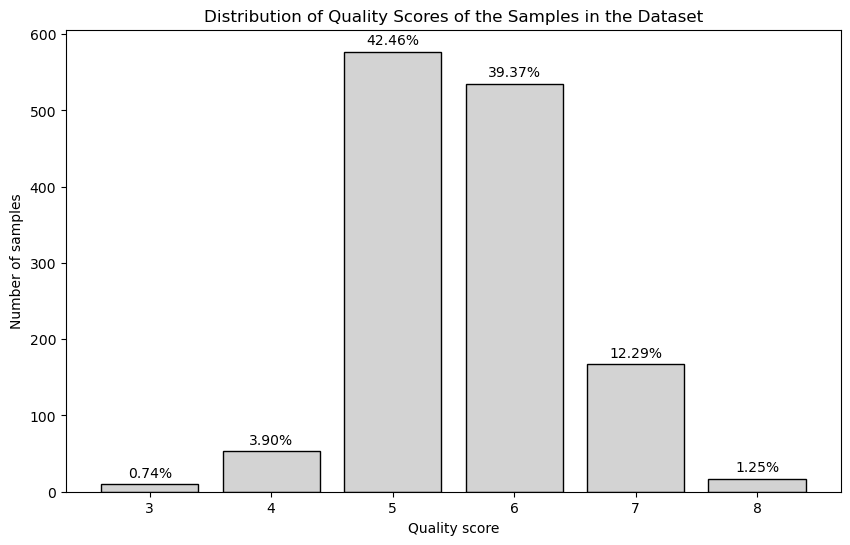

In [11]:
plot_percentage_bars(
        data_frame = df,
        column =  'quality',
        x_label = 'Quality score',
        y_label = 'Number of samples',
        title = 'Distribution of Quality Scores of the Samples in the Dataset') 

### The Distribution of Wine Characteristics in Terms of the Quality

To understand the relationship between physical/chemical properties and sensory scores, all physical and chemical properties features will be evaluated in accordance with the sensory characteristics score ('Quality' feature). For this reason, the boxplot visualization method will be used first.

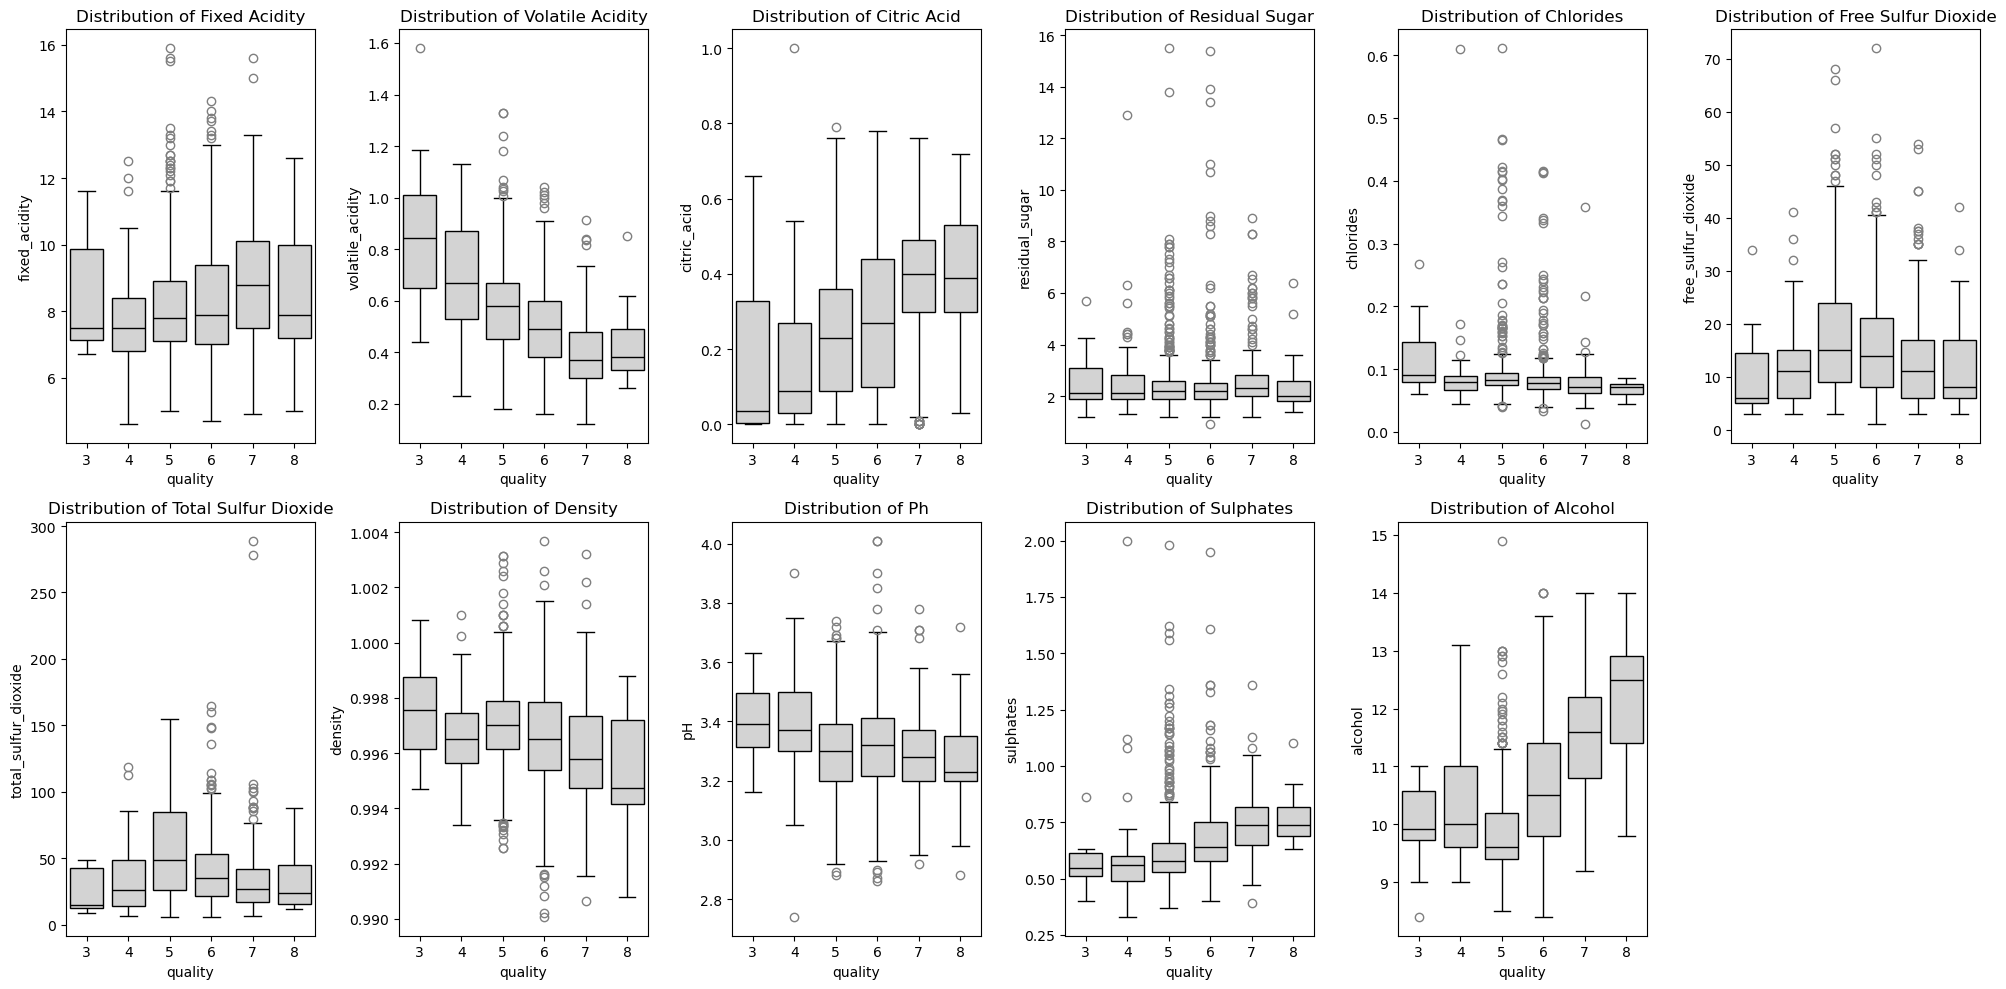

In [12]:
plot_boxplots(
    data_frame = df,
    target_column = 'quality'
)

 From the graphs above, several trends can be observed already without additional analysis:
- Wines with **lower volatile acidity are better rated** (and _vice versa_). This could indicate that wines with lower volatile acidity levels may have a smoother taste profile, with less of a sharp or vinegary taste.
 - Wines with **higher citric acid content are better rated** (and _vice versa_). This might suggest that wines with higher citric acid levels possess a brighter, more refreshing taste, potentially enhancing their overall appeal.
 - Wines with **lower density are better rated** (and _vice versa_). This observation may imply that wines with lower density feel lighter on the palate and are perceived as more delicate or elegant in taste.
 - Wines with **higher sulphate content are better rated** (and _vice versa_). This trend could signify that wines with higher sulphate levels exhibit improved preservation, contributing to a cleaner, more stable taste profile over time.
  - Wines with **higher alcohol content are better rated** (and _vice versa_). This finding may indicate that wines with higher alcohol levels offer a richer, fuller-bodied taste experience.

**Note**: _It should be remembered that there is a very different amount of samples with different quality scores in thedata set, which could affected the distribution._

## Relationship Between Wine Properties

Through scatter plots, correlation matrices, and other visualization techniques, it can be observed how different features relate to each other and to the target variables (Alcohol, Quality). Understanding these relationships is crucial not only to enhance our understanding of the dataset, but also it helps identify which variables have a linear relationship, suggesting they could be good predictors for linear models.

### Scatter Plot Analysis of Pairwise Feature Relationships

Given that the previous visualization illustrated the relationship between each physical/chemical property and the quality feature, in the forthcoming scatter plots, all features will be compared against each other, with quality serving as an optional third dimension. Additionally, _Kernel Density Estimation_ (KDE) Plots will be employed to visualize the distribution of these features.

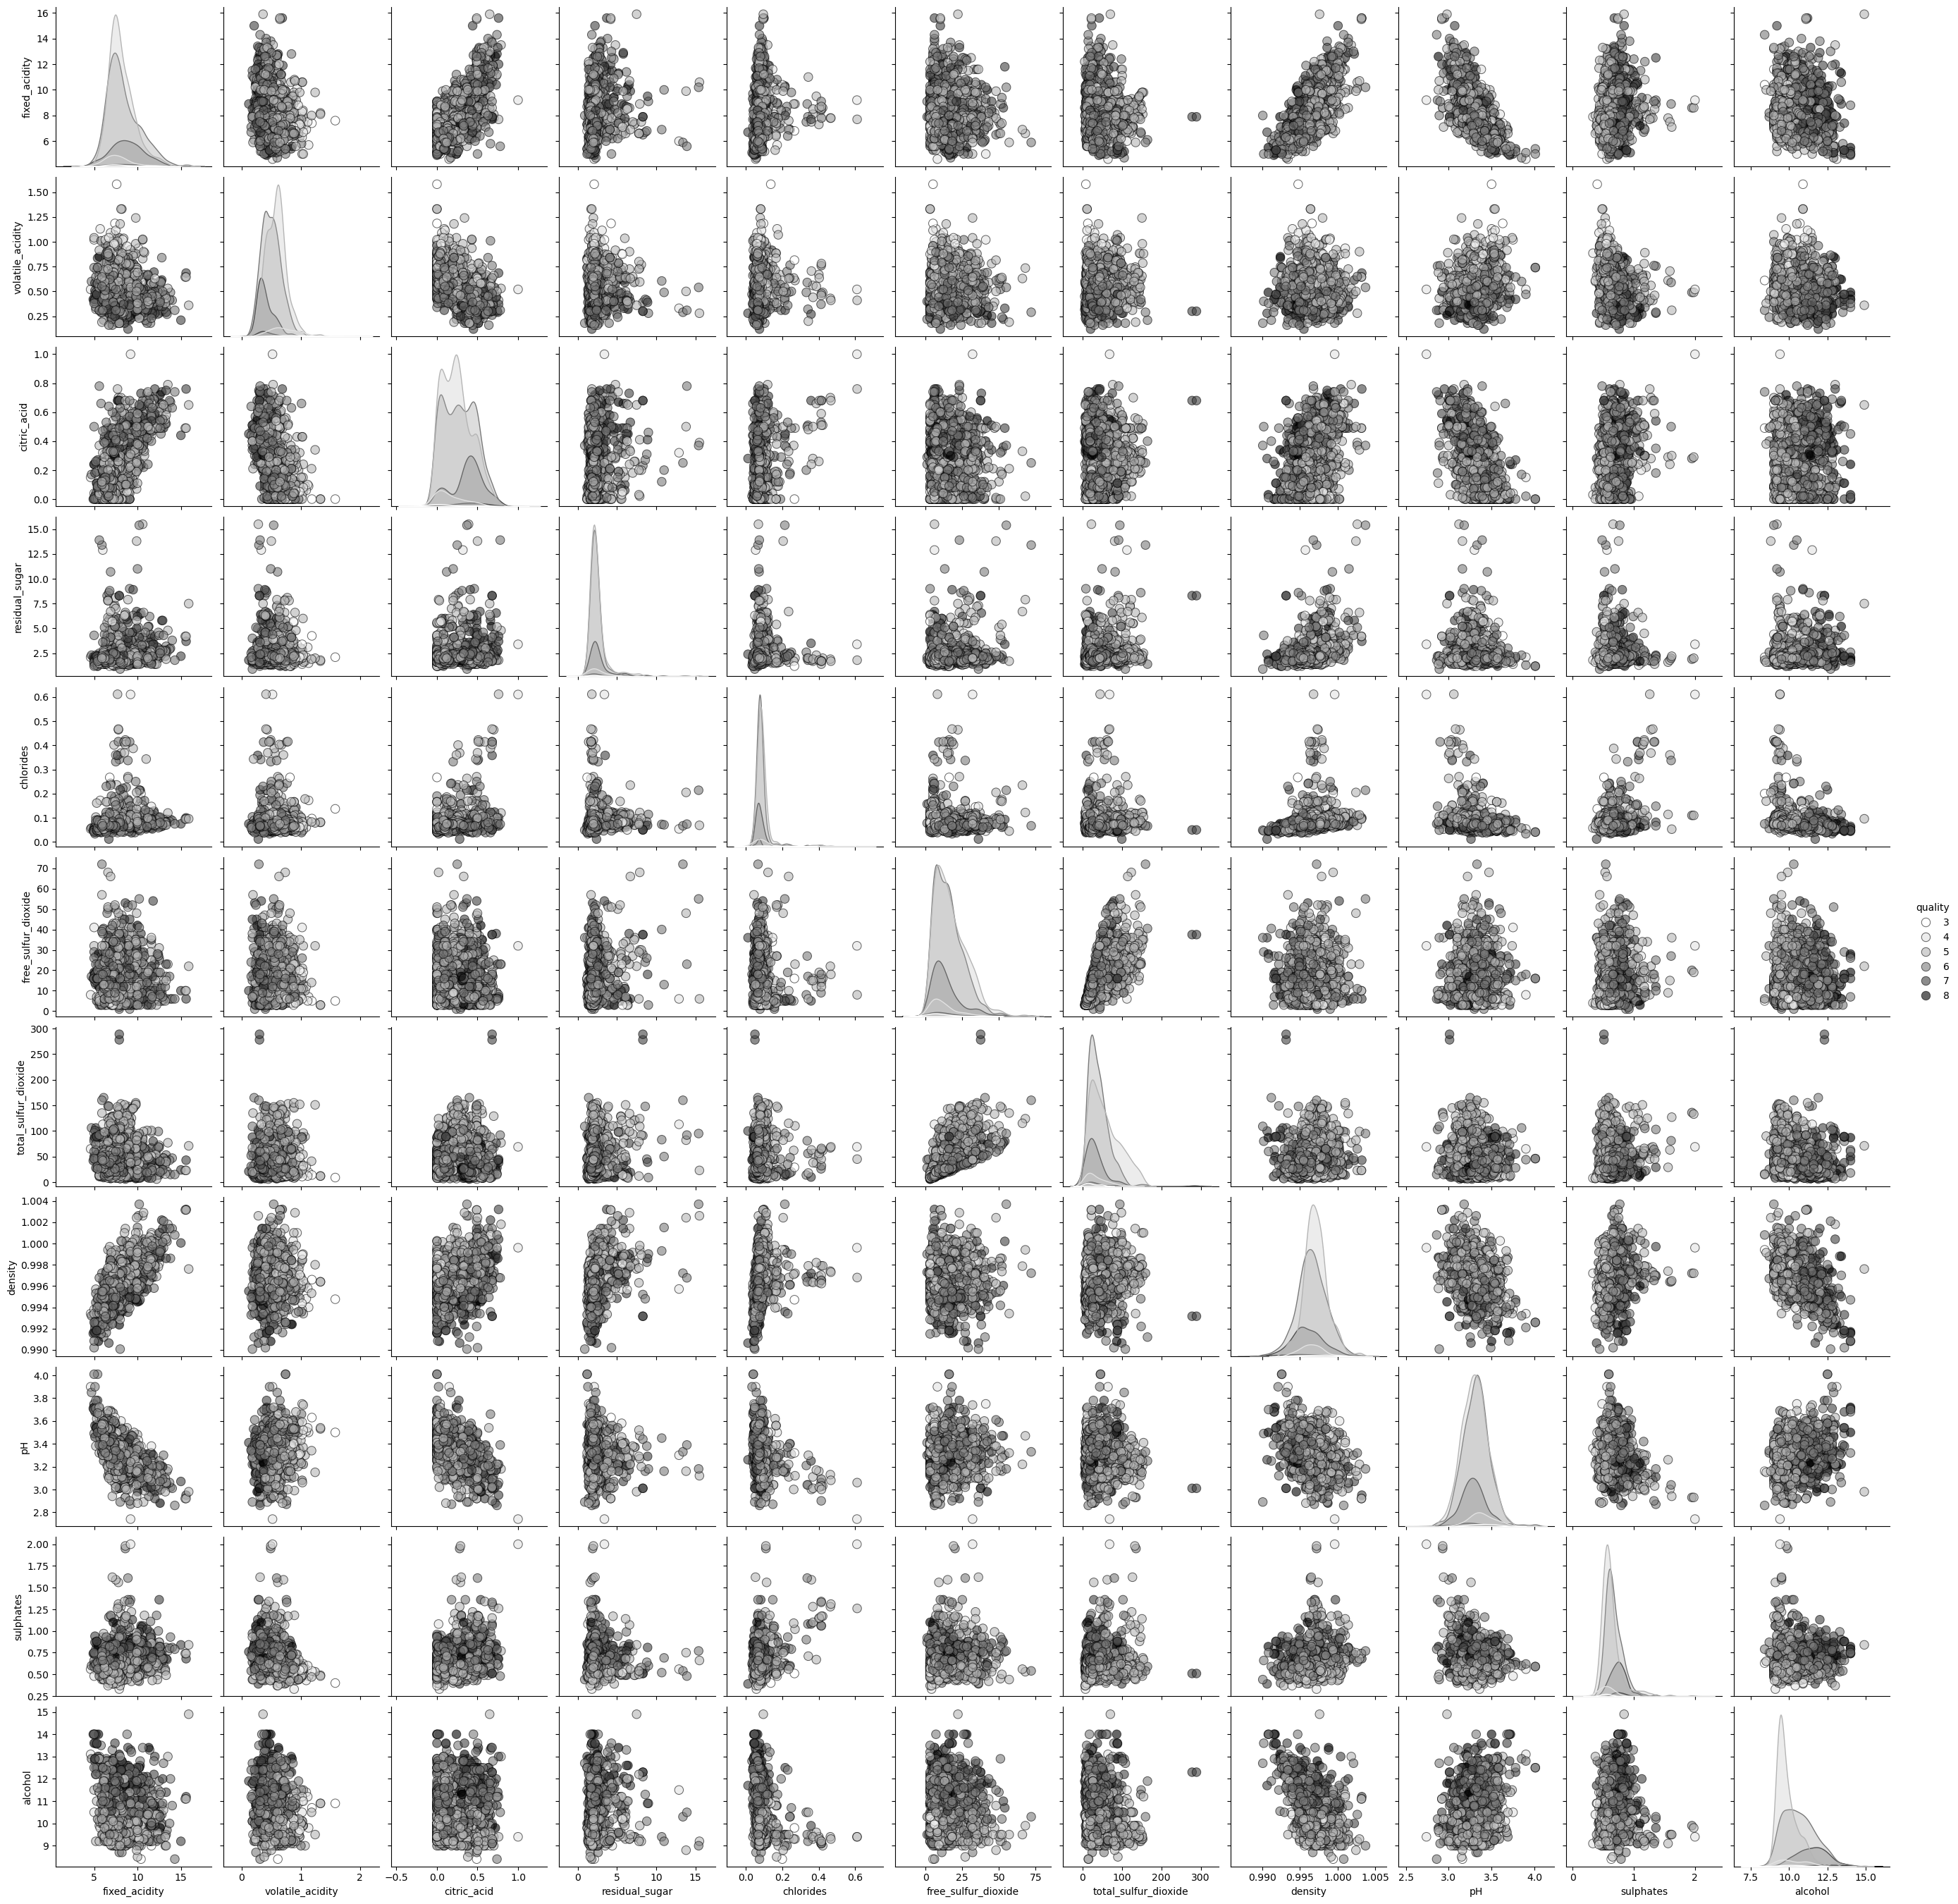

In [13]:
plot_feature_scatter_plots(
    data_frame=df,
    hue='quality'
)

__From the scatter and KDE plots above, it can be seen that__:
* Some features exhibit either a strong positive (e.g. density and fixed acidity) or strong negative (e.g. pH and fixed acidity) linear relationship.
* Additionally, the KDE plots indicate that certain features are distributed with a skew to the left (negatively), e.g. residual sugar, free sulfur dioxide or alcohol. These skewed distributions suggest that the data does not conform to a normal distribution, which can have implications for statistical analysis and accurate modeling.

### Feature Correlation Analysis and Visualization

In the previous scatter plot visualizations, a potential relationship between features can be observed, suggesting an underlying pattern within the dataset. To evaluate the strength of these relationships, the subsequent step will involve the use of a __Pearson__ (_standard correlation coefficient, which is measured of linear correlation between two sets of data_) __method__.

Additionally, to enhance the interpretability of these results, a __heatmap__ will be employed for __visualization__. This approach will not only highlight significant correlations but also aid in identifying potential predictors for further analysis, providing a clearer insight into the dynamics within the data.

In [14]:
correlation_matrix = df.corr()
correlation_matrix

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.255124     0.667437   
volatile_acidity          -0.255124          1.000000    -0.551248   
citric_acid                0.667437         -0.551248     1.000000   
residual_sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free_sulfur_dioxide       -0.140580         -0.020945    -0.048004   
total_sulfur_dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.111025   0.085886            -0.140580   
volatile_acidity           -0.002449   0.055154            -0.020945   
citric_acid                 0.143892   0.210195            -0.048004   
residual_sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free_sulfur_dioxide         0.160527   0.000749             1.000000   
total_sulfur_dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile_acidity                  0.071701  0.023943  0.247111  -0.256948   
citric_acid                       0.047358  0.357962 -0.550310   0.326062   
residual_sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free_sulfur_dioxide               0.667246 -0.018071  0.056631   0.054126   
total_sulfur_dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed_acidity        -0.061596  0.119024  
volatile_acidity     -0.197812 -0.395214  
citric_acid           0.105108  0.228057  
residual_sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free_sulfur_dioxide  -0.080125 -0.050463  
total_sulfur_dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

The following heatmap visualization will help more quickly and easily assess the strengths and quantity of correlations.

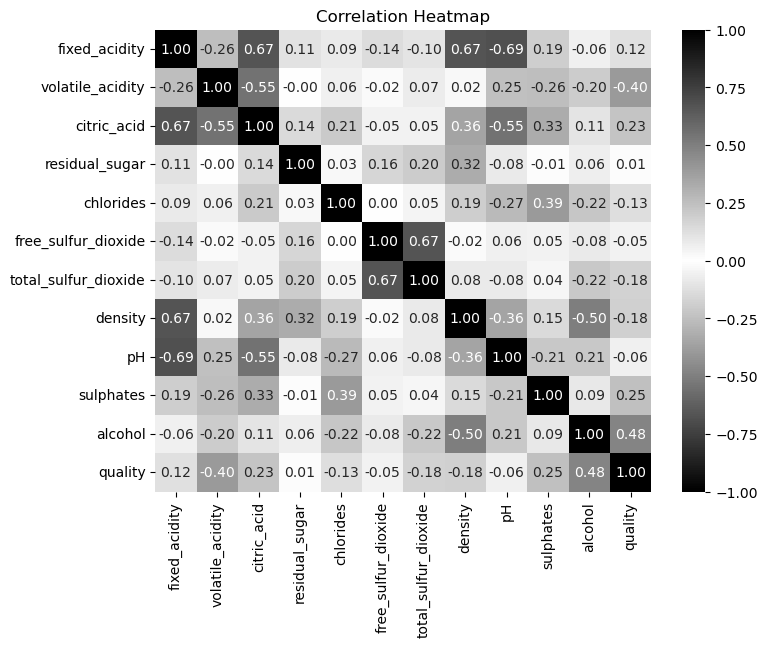

In [15]:
plot_correlation_heatmap(
    correlation_matrix = correlation_matrix
)

The results now can be summarized, with the analysis focusing on identifying those features that exhibit strong relationships, both positive and negative, based on the calculated coefficients.

In [16]:
find_corr_pairs(
    data_frame=df,
    correlation_types=['positive_strong', 'negative_strong']
)

Positive Strong correlated pairs(between 0.6 and 1):
Pair: ('free_sulfur_dioxide', 'total_sulfur_dioxide'), Score: 0.6672462292780184
Pair: ('citric_acid', 'fixed_acidity'), Score: 0.6674373845302918
Pair: ('density', 'fixed_acidity'), Score: 0.6701950166537876
Negative Strong correlated pairs(between -1 and -0.6):
Pair: ('fixed_acidity', 'pH'), Score: -0.6866851055982736


These insights could guide targeted adjustments in the winemaking process to improve desired outcomes.

However, the main goal of this analysis is to create a successful model for predicting target values, the strong correlations among certain features (_like free sulfur dioxide and total sulfur dioxide_) require caution and will be considered to avoid multicollinearity, which could distort the models' interpretations.

## Analysis of Wine Characteristics: Distribution Across Target Variables

During the analysis of wine characteristics and distribution across targer variables, the wine samples will be categorized based on their alcohol content — distinguishing between high and low levels, as well as their quality scores, segregating samples with high and low ratings.

Wine samples are sorted into __two__ categories based on quality score and alcohol content:

 - For __Quality__ - the top 25% of wines with the highest scores are called '__high__' __quality__. The rest, below the 75th percentile, are called '__low__' __quality__. 

 - For __Alcohol__ - wines are split into '__high__' and '__low__' __groups__ based on the median alcohol level.

__Note__: Choosing the median values within alcohol groups mitigates the impact of potential outliers, thereby providing a robust and reliable basis for statistical analysis and subsequent conclusions.

In [17]:
df_wine_classifications = df.copy()

quality_threshold = df_wine_classifications['quality'].quantile(0.75)
alcohol_median = df_wine_classifications['alcohol'].median()

df_wine_classifications['quality_status'] = df_wine_classifications['quality'].apply(
    lambda quality: 'high' if quality > quality_threshold else 'low'
)

df_wine_classifications['alcohol_status'] = df_wine_classifications['alcohol'].apply(
    lambda alcohol: 'high' if alcohol > alcohol_median else 'low'
)

The forthcoming boxplot visualizations will illustrate the distribution of wine characteristics for the designated 'low' and 'high' groups. This graphical analysis seeks to reveal patterns in wine attributes across these categories, providing a concise overview of how each feature correlates with the target variables.

### Characteristic Distributions by Quality Scores

In [18]:
df_quality_status = df_wine_classifications.drop(['quality', 'alcohol_status'], axis=1)

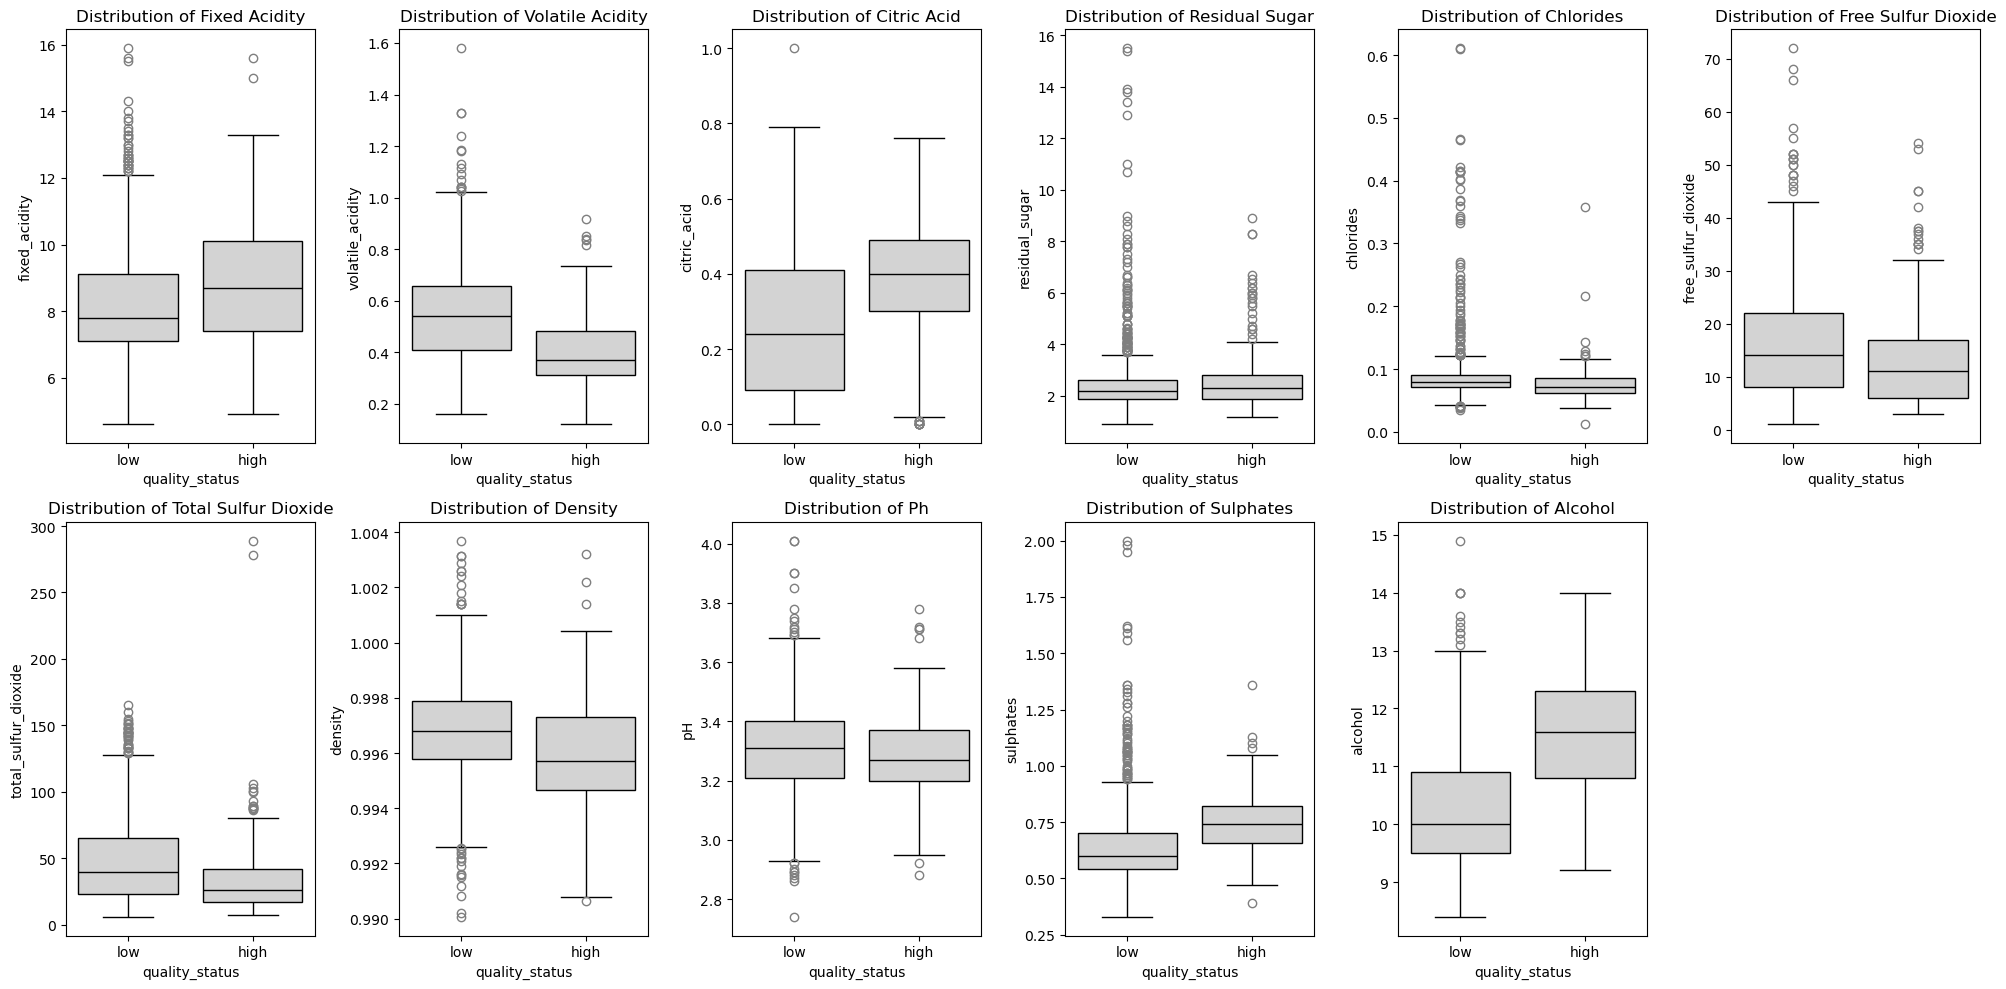

In [19]:
plot_boxplots(
    data_frame = df_quality_status,
    target_column = 'quality_status'
)

The precise values of the characteristics by quality score groups are presented in the following table:

In [20]:
low_quality = df_quality_status[df_quality_status['quality_status'] == 'low']
high_quality = df_quality_status[df_quality_status['quality_status'] == 'high']

df_by_quality = pd.DataFrame()

for column in [col for col in df_quality_status.columns if col != 'quality_status']:
    
    df_by_quality.loc[column, 'low_quality_mean'] = low_quality[column].mean()
    df_by_quality.loc[column, 'low_quality_median'] = low_quality[column].median()
    df_by_quality.loc[column, 'low_quality_std'] = low_quality[column].std()
    df_by_quality.loc[column, 'low_quality_count'] = low_quality[column].count()
        
    df_by_quality.loc[column, 'high_quality_mean'] = high_quality[column].mean()
    df_by_quality.loc[column, 'high_quality_median'] = high_quality[column].median()
    df_by_quality.loc[column, 'high_quality_std'] = high_quality[column].std()
    df_by_quality.loc[column, 'high_quality_count'] = high_quality[column].count()

df_by_quality

low_quality_mean  low_quality_median  low_quality_std  \
fixed_acidity                 8.230809              7.8000         1.681958   
volatile_acidity              0.548834              0.5400         0.181265   
citric_acid                   0.256587              0.2400         0.191236   
residual_sugar                2.495149              2.2000         1.347013   
chlorides                     0.090014              0.0800         0.051505   
free_sulfur_dioxide          16.194043             14.0000        10.444885   
total_sulfur_dioxide         48.621702             40.0000        32.924764   
density                       0.996826              0.9968         0.001790   
pH                            3.313106              3.3100         0.154916   
sulphates                     0.645098              0.6000         0.171836   
alcohol                      10.256851             10.0000         0.983391   

                      low_quality_count  high_quality_mean  \
fixed_acidity                    1175.0           8.820109   
volatile_acidity                 1175.0           0.405870   
citric_acid                      1175.0           0.372880   
residual_sugar                   1175.0           2.703804   
chlorides                        1175.0           0.076049   
free_sulfur_dioxide              1175.0          13.972826   
total_sulfur_dioxide             1175.0          35.358696   
density                          1175.0           0.995963   
pH                               1175.0           3.288587   
sulphates                        1175.0           0.745598   
alcohol                          1175.0          11.552808   

                      high_quality_median  high_quality_std  \
fixed_acidity                      8.7000          1.984634   
volatile_acidity                   0.3700          0.141576   
citric_acid                        0.4000          0.193280   
residual_sugar                     2.3000          1.375751   
chlorides                          0.0715          0.030076   
free_sulfur_dioxide               11.0000         10.284575   
total_sulfur_dioxide              26.5000         34.283798   
density                            0.9957          0.002172   
pH                                 3.2700          0.154542   
sulphates                          0.7400          0.133926   
alcohol                           11.6000          1.012276   

                      high_quality_count  
fixed_acidity                      184.0  
volatile_acidity                   184.0  
citric_acid                        184.0  
residual_sugar                     184.0  
chlorides                          184.0  
free_sulfur_dioxide                184.0  
total_sulfur_dioxide               184.0  
density                            184.0  
pH                                 184.0  
sulphates                          184.0  
alcohol                            184.0

### Characteristic Distributions by Alcohol Content

In [21]:
df_alcohol_status = df_wine_classifications.drop(['alcohol', 'quality_status'], axis=1)

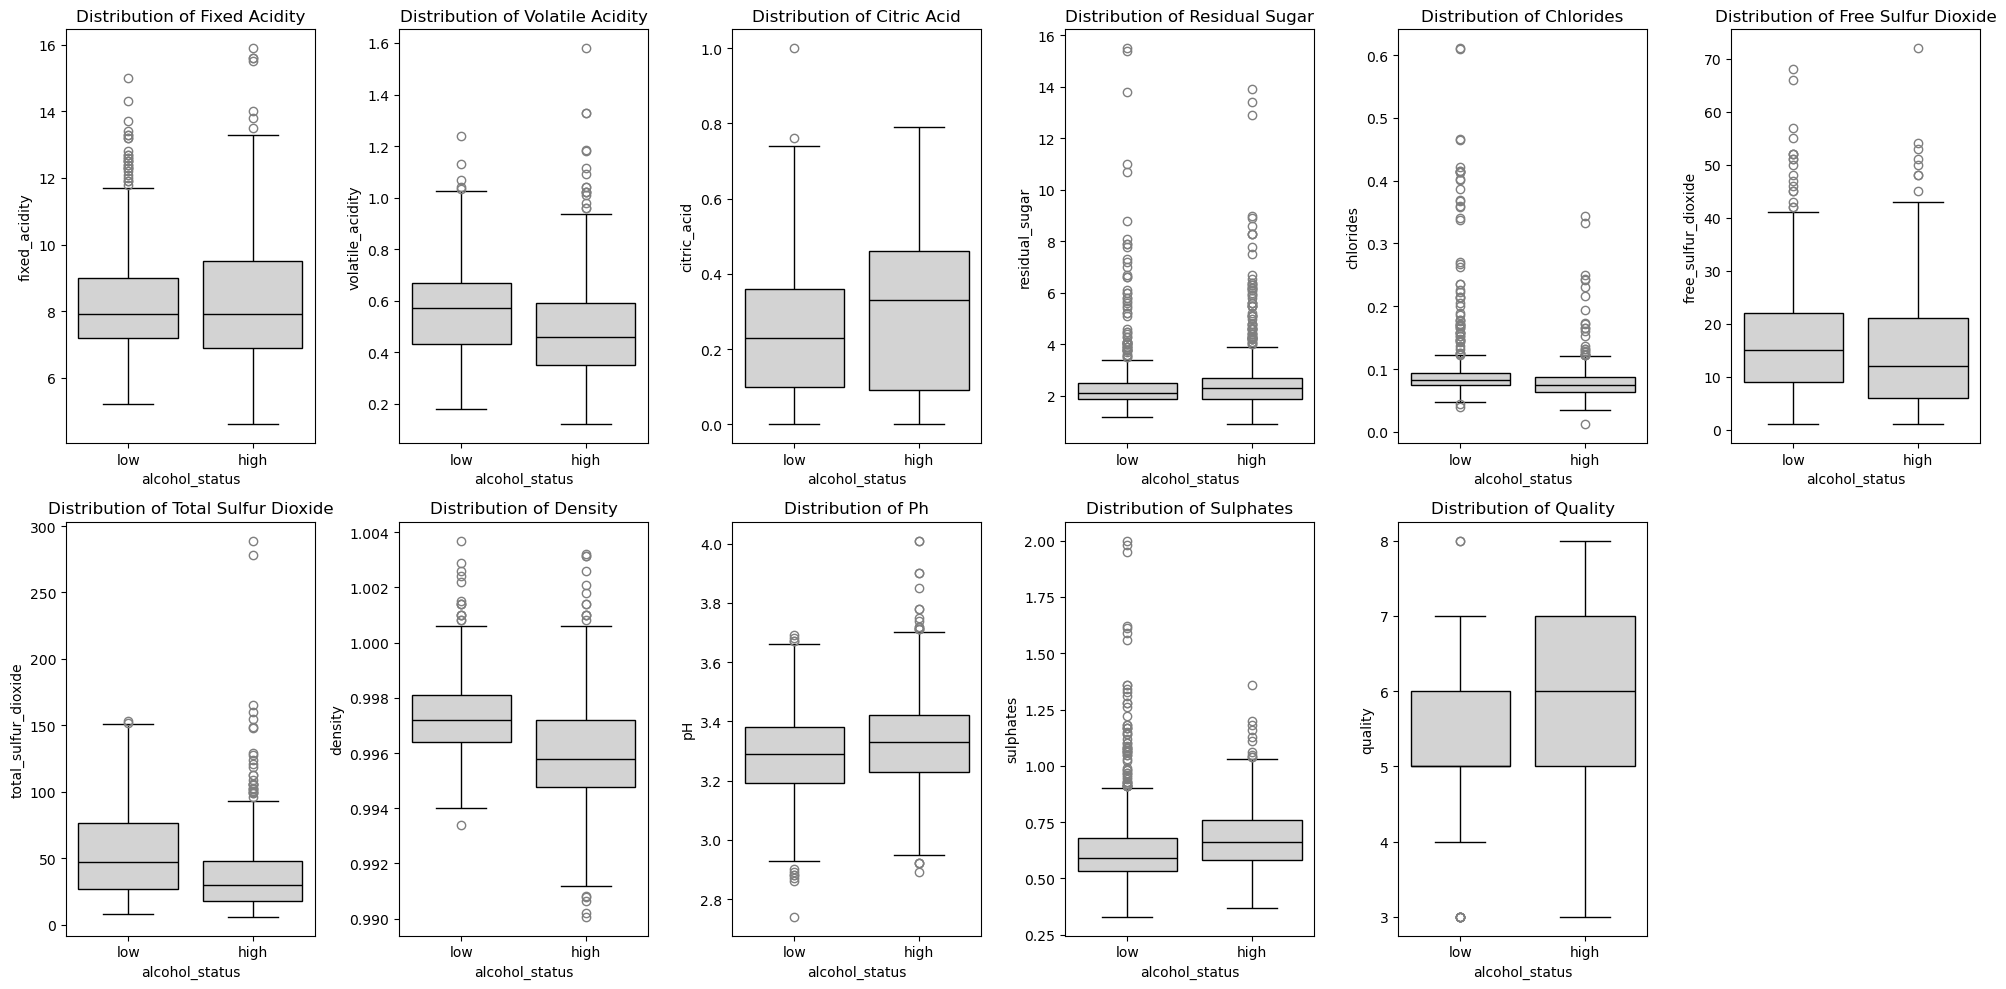

In [22]:
plot_boxplots(
    data_frame = df_alcohol_status,
    target_column = 'alcohol_status'
)

The precise values of the characteristics by alcohol content groups are presented in the following table:

In [23]:
low_alcohol = df_alcohol_status[df_alcohol_status['alcohol_status'] == 'low']
high_alcohol = df_alcohol_status[df_alcohol_status['alcohol_status'] == 'high']

df_by_alcohol = pd.DataFrame()

for column in [col for col in df_alcohol_status.columns if col != 'alcohol_status']:
    
    df_by_alcohol.loc[column, 'low_alcohol_mean'] = low_alcohol[column].mean()
    df_by_alcohol.loc[column, 'low_alcohol_median'] = low_alcohol[column].median()
    df_by_alcohol.loc[column, 'low_alcohol_std'] = low_alcohol[column].std()
    df_by_alcohol.loc[column, 'low_alcohol_count'] = low_alcohol[column].count()
        
    df_by_alcohol.loc[column, 'high_alcohol_mean'] = high_alcohol[column].mean()
    df_by_alcohol.loc[column, 'high_alcohol_median'] = high_alcohol[column].median()
    df_by_alcohol.loc[column, 'high_alcohol_std'] = high_alcohol[column].std()
    df_by_alcohol.loc[column, 'high_alcohol_count'] = high_alcohol[column].count()

df_by_alcohol

low_alcohol_mean  low_alcohol_median  low_alcohol_std  \
fixed_acidity                 8.324930              7.9000         1.526276   
volatile_acidity              0.563433              0.5700         0.167767   
citric_acid                   0.247549              0.2300         0.181714   
residual_sugar                2.435864              2.1000         1.327981   
chlorides                     0.096584              0.0820         0.061048   
free_sulfur_dioxide          16.665738             15.0000        10.505081   
total_sulfur_dioxide         54.770891             47.0000        34.792422   
density                       0.997354              0.9972         0.001411   
pH                            3.285529              3.2900         0.146170   
sulphates                     0.643524              0.5900         0.195459   
quality                       5.307799              5.0000         0.654324   

                      low_alcohol_count  high_alcohol_mean  \
fixed_acidity                     718.0           8.294540   
volatile_acidity                  718.0           0.491443   
citric_acid                       718.0           0.300094   
residual_sugar                    718.0           2.621451   
chlorides                         718.0           0.078647   
free_sulfur_dioxide               718.0          15.028081   
total_sulfur_dioxide              718.0          37.926677   
density                           718.0           0.995986   
pH                                718.0           3.336958   
sulphates                         718.0           0.675710   
quality                           718.0           5.976599   

                      high_alcohol_median  high_alcohol_std  \
fixed_acidity                      7.9000          1.947230   
volatile_acidity                   0.4600          0.191858   
citric_acid                        0.3300          0.206580   
residual_sugar                     2.3000          1.373481   
chlorides                          0.0750          0.028772   
free_sulfur_dioxide               12.0000         10.321814   
total_sulfur_dioxide              30.0000         29.360836   
density                            0.9958          0.002047   
pH                                 3.3300          0.160207   
sulphates                          0.6600          0.135851   
quality                            6.0000          0.850229   

                      high_alcohol_count  
fixed_acidity                      641.0  
volatile_acidity                   641.0  
citric_acid                        641.0  
residual_sugar                     641.0  
chlorides                          641.0  
free_sulfur_dioxide                641.0  
total_sulfur_dioxide               641.0  
density                            641.0  
pH                                 641.0  
sulphates                          641.0  
quality                            641.0

The visualizations and summary tables reveal distinct differences in the characteristics of the evaluated groups. In the next step, hypothesis testing will be employed to determine the statistical significance of these differences.

# Statistical Inference

In the following analysis, confidence intervals (CIs) will first be calculated for high-quality wines, providing a statistical range within which the true mean values of these features are likely to fall. This step will be instrumental in quantifying the uncertainty around the average characteristics of high-quality wines.

Following this, the analysis will examine wine sample parameters using hypothesis testing to identify significant variations in wine characteristics. Based on the results of hypothesis testing, an evidence-based selection of features will be conducted to enhance the accuracy and relevance of prediction models.

## Specifications of the High Quality Wine

Based on the available wine samples, this analysis will determine the values of measured parameters at which wine is rated most highly. By identifying these thresholds, it will be possible to assess whether a wine qualifies as being of the highest quality score. This approach aims to establish a clear benchmark for the attributes that characterize superior wine quality, providing a quantitative foundation for evaluating the excellence of wine based on its measurable characteristics.

__Note__: as in the previous section, the top 25% of wines with the highest scores are called 'high' quality. 

In [24]:
high_quality_wine_specs = calculate_confidence_intervals_z(high_quality, 0.95)
high_quality_wine_specs

Mean   Lower CI   Upper CI
fixed_acidity          8.820109   8.533348   9.106869
volatile_acidity       0.405870   0.385413   0.426326
citric_acid            0.372880   0.344953   0.400808
residual_sugar         2.703804   2.505021   2.902587
chlorides              0.076049   0.071703   0.080395
free_sulfur_dioxide   13.972826  12.486803  15.458849
total_sulfur_dioxide  35.358696  30.405014  40.312378
density                0.995963   0.995649   0.996277
pH                     3.288587   3.266257   3.310917
sulphates              0.745598   0.726247   0.764949
alcohol               11.552808  11.406544  11.699072

Based on the collected red wine data, the table above presents confidence intervals calculated for the average values of various physical and chemical properties of the wine, with a 95% confidence level. This indicates that we can be 95% confident that the true mean values of these properties for the sampled population fall within the specified ranges.

__However__, it's important to note that these intervals reflect estimates of average values rather than direct criteria for evaluating wine as high quality. Further analysis is required to establish a causal relationship between specific property values and the quality assessment of wine. Additionally, it should be recognized that if the dataset were larger or compositionally different, the derived values and the conceptual framework of what constitutes high quality could potentially vary.

## Hypothesis testing

In this section, an examination will be conducted to determine the statistical significance of differences between wine features and target variables. It is aimed to test whether the mean values of various wine characteristics significantly differ between groups categorized by low and high values of the target variables. This analysis is important for initiating the creation of a linear regression model for the target variables, guiding the selection of features with a significant impact to be included in the model.

__Hypothesis testing will include the following steps__:
1. Define null and alternative hypotheses.
2. Examine data, check assumptions, and calculate test statistic and determine correponding p-value.
4. Make a decision about null hypothesis.

__Parameters mentioned in further analysis__:
* __T-statistic__: _measures the number of standard deviations by which the observed sample mean differs from the expected population mean, assuming the null hypothesis holds true. A higher absolute value of the T-statistic signifies more substantial evidence against the null hypothesis._
* __P-Value__ (p): _the probability of obtaining the observed result of z-statistic if the null hypothesis is true. If the p-value is less than or equal to established significance level α (p ≤ α), typically the null hypothesis is rejected._
* __low_status__: _a subset of the main dataset representing the 'low' status group, used for comparative analysis in hypothesis testing._
* __high_status__: _a subset of the main dataset representing the 'high' status group, also used for comparative analysis in hypothesis testing._
* __Significance__: _status, that indicates whether the difference between the means of the two groups (e.g., 'low_status' and 'high_status') is statistically significant based on the calculated P-value._ 

### Hypothesis Testing for Feature Impact on Wine Quality

In this subsection, hypothesis testing will be conducted across all features relative to the wine quality target variable, which has been divided into 'low' and 'high' quality groups. This analysis aims to identify which features exhibit significant differences in their distributions between the low and high quality categories.

__Null Hypothesis__ (H0): The mean value of each wine feature is equal between wines classified as having 'low' quality and those classified as having 'high' quality:
$\mu_{low} = \mu_{high}$

__Alternative Hypothesis__ (Ha): The mean value of each wine feature differs between wines classified as having 'low' quality and those classified as having 'high' quality: $\mu_{low} \neq \mu_{high}$

The observations within each sample are assumed as independent of each other (the measurement (value) of any single observation (e.g., the pH level or sulphates content of a wine sample) in the dataset is not influenced by the values of any other observations in the same quality group).

The sample sizes for both 'low' and 'high' quality groups are sufficiently large (n ≥ 30).

Significance Level (α) is chosen to be equal to 0.05.

In [25]:
significance_by_quality_summary = perform_t_tests(
    data_frame=df_quality_status,
    alpha=0.05,
    status_column='quality_status',
    low_status=low_quality,
    high_status=high_quality
)

significance_by_quality_summary

Feature  T-Statistic       P-Value Significance
0          fixed_acidity    -4.306707  1.776226e-05          Yes
1       volatile_acidity    10.220299  1.129899e-23          Yes
2            citric_acid    -7.659038  3.542949e-14          Yes
3         residual_sugar    -1.948125  5.160595e-02           No
4              chlorides     3.582923  3.517917e-04          Yes
5    free_sulfur_dioxide     2.687814  7.280097e-03          Yes
6   total_sulfur_dioxide     5.052240  4.961497e-07          Yes
7                density     5.896365  4.683732e-09          Yes
8                     pH     1.996973  4.602751e-02          Yes
9              sulphates    -7.580189  6.364290e-14          Yes
10               alcohol   -16.555555  3.244151e-56          Yes

__Conclution__: Based on the T-test results with a significance level of 0.05, with 95% confidence, we reject the null hypothesis for the most features, indicating a statistically significant difference in the mean values of these features between high and low quality wine groups. Specifically, significant differences are observed in fixed acidity, volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol content. The only exception where we __fail to reject the null hypothesis is with residual sugar__, suggesting no significant difference in its mean values between the two groups.

### Hypothesis Testing for Feature Impact on Alcohol Level

In this subsection, hypothesis testing will be conducted across all features relative to the wine alcohol level target variable, which has been divided into 'low' and 'high' quality groups. This analysis aims to identify which features exhibit significant differences in their distributions between the wine samples with low and high alcohol content categories.

__Null Hypothesis__ (H0): The mean value of each wine feature is equal between wines classified as having 'low' alcohol content and those classified as having 'high' alcohol content:
$\mu_{low} = \mu_{high}$

__Alternative Hypothesis__ (Ha): The mean value of each wine feature differs between wines classified as having 'low' alcohol content and those classified as having 'high' alcohol content: $\mu_{low} \neq \mu_{high}$

The observations within each sample are assumed as independent of each other (the measurement (value) of any single observation (e.g., the pH level or sulphates content of a wine sample) in the dataset is not influenced by the values of any other observations in the same quality group).

The sample sizes for both 'low' and 'high' alcohol content groups are sufficiently large (n ≥ 30).

Significance Level (α) is chosen to be equal to 0.05.

In [26]:
significance_by_alcohol_summary = perform_t_tests(
    data_frame=df_alcohol_status,
    alpha=0.05,
    status_column='alcohol_status',
    low_status=low_alcohol,
    high_status=high_alcohol
)

significance_by_alcohol_summary

Feature  T-Statistic       P-Value Significance
0          fixed_acidity     0.321870  7.476011e-01           No
1       volatile_acidity     7.379249  2.763472e-13          Yes
2            citric_acid    -4.988499  6.872244e-07          Yes
3         residual_sugar    -2.530549  1.150069e-02          Yes
4              chlorides     6.795050  1.616317e-11          Yes
5    free_sulfur_dioxide     2.892520  3.882614e-03          Yes
6   total_sulfur_dioxide     9.583646  4.282938e-21          Yes
7                density    14.466080  3.232190e-44          Yes
8                     pH    -6.187785  8.064041e-10          Yes
9              sulphates    -3.484784  5.082209e-04          Yes
10               quality   -16.342849  6.062450e-55          Yes

__Conclution__: Based on the T-test results with a significance level of 0.05, with 95% confidence, we reject the null hypothesis for the most features, indicating a statistically significant difference in the mean values of these features between high and low alcohol content wine groups. Specifically, significant differences are observed in volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and quality content. The only exception where we __fail to reject the null hypothesis is with fixed acidity__, suggesting no significant difference in its mean values between the two groups.

# Development of a Linear Regression Model

In this section, the focus shifts towards the development of a linear regression model aimed at predicting the values of target variables: __quality__ and __alcohol__ content in wine. Insights acquired from previous analyses regarding feature relationship and the significance of various wine characteristics will guide the  evidence-based feature selection and initial model creation.

The primary criterion for this selection process hinges on minimizing multicollinearity among predictor variables. To this end, features exhibiting no or weak correlation with each other will be prioritized for selection, thereby safeguarding the model against the adverse effects of multicollinearity.

For features found to have strong correlations with one another, preference will be given to those variables that demonstrate a higher correlation coefficient with the target variable, ensuring that the most predictive factors are incorporated into the model.

Additionally, insights garnered from hypothesis testing will play a crucial role in the selection process. Features that do not show statistical significance in differentiating between groups within the dependent variable and target variable will be considered for exclusion.

Moreover, the distribution of the dependent variable will also be checked and adjusted or normalized as necessary, ensuring that the model's assumptions are adequately met for accurate predictions.

## Selection of Dependent Variables for Quality Prediction Model

The criteria for selecting dependent variables for the prediction model include:

* __Minimizing Multicollinearity__: Ensuring that chosen features have minimal or no correlation with one another to prevent redundancy and improve model stability.
* __Maximizing Correlation with Target Variable__: Selecting features with the strongest correlations to the target variable to enhance predictive accuracy.
* __Statistical Significance__: Incorporating variables that have shown significant differences between groups, as determined by hypothesis testing, to ensure the relevance of the model to the target variable.

The strong pairs identified during DEA analyzes are:

In [27]:
find_corr_pairs(
    data_frame=df,
    correlation_types=['positive_strong', 'negative_strong']
)

Positive Strong correlated pairs(between 0.6 and 1):
Pair: ('free_sulfur_dioxide', 'total_sulfur_dioxide'), Score: 0.6672462292780184
Pair: ('citric_acid', 'fixed_acidity'), Score: 0.6674373845302918
Pair: ('density', 'fixed_acidity'), Score: 0.6701950166537876
Negative Strong correlated pairs(between -1 and -0.6):
Pair: ('fixed_acidity', 'pH'), Score: -0.6866851055982736


The correlation coeficient values for above mentioned feature pairs and the target variable :

In [28]:
free_sulfur_dioxide_with_quality=round(df['free_sulfur_dioxide'].corr(df['quality']), 4)
total_sulfur_dioxide_with_quality=round(df['total_sulfur_dioxide'].corr(df['quality']),4)
citric_acid_with_quality=round(df['citric_acid'].corr(df['quality']),4)
density_with_quality=round(df['density'].corr(df['quality']),4)
fixed_acidity_with_quality=round(df['fixed_acidity'].corr(df['quality']),4)
pH_with_quality=round(df['pH'].corr(df['quality']),4)

In [29]:
print(
    f" Pairs supplemented by correlation coef. with target variable:\n"
    f" Free Sulfur Dioxide ({free_sulfur_dioxide_with_quality}) and"
    f" Total Sulfur Dioxide ({total_sulfur_dioxide_with_quality});\n"
    f" Citric Acid ({citric_acid_with_quality}) and Fixed Acidity({fixed_acidity_with_quality});\n"
    f" Density ({density_with_quality}) and Fixed Acidity ({fixed_acidity_with_quality});\n"
    f" pH ({pH_with_quality}) and Fixed Acidity ({fixed_acidity_with_quality})."
)

 Pairs supplemented by correlation coef. with target variable:
 Free Sulfur Dioxide (-0.0505) and Total Sulfur Dioxide (-0.1779);
 Citric Acid (0.2281) and Fixed Acidity(0.119);
 Density (-0.1843) and Fixed Acidity (0.119);
 pH (-0.0552) and Fixed Acidity (0.119).


Features that exhibited no significant differences in their distributions between the __low__ and __high quality__ categories:

In [30]:
significance_by_quality_summary[significance_by_quality_summary['Significance']=='No']

Feature  T-Statistic   P-Value Significance
3  residual_sugar    -1.948125  0.051606           No

In the next step, a list of which features should be used as predictor variable to create the model will be created.

__Note__: It is worth noting that  __Fixed Acidity__ appears in three out of the four listed pairs. This repetition indicates that "Fixed Acidity" shares significant variance with multiple other predictors, which could potentially create multicollinearity issues within the model and is chosen to be excluded. 

Features for quality prediction model are saved as a seperate list of features:

In [31]:
all_features = list(df.columns)
features_to_exclude = ['quality', 'free_sulfur_dioxide', 'fixed_acidity',  'residual_sugar']

quality_predictor_variables = [
    feature for feature in all_features if feature not in features_to_exclude
]

## Selection of Dependent Variables for Alcohol Content Prediction Model

The criteria for selecting dependent variables for the prediction model include:

* __Minimizing Multicollinearity__: Ensuring that chosen features have minimal or no correlation with one another to prevent redundancy and improve model stability.
* __Maximizing Correlation with Target Variable__: Selecting features with the strongest correlations to the target variable to enhance predictive accuracy.
* __Statistical Significance__: Incorporating variables that have shown significant differences between groups, as determined by hypothesis testing, to ensure the relevance of the model to the target variable.

The strong pairs identified during DEA analyzes are:

In [32]:
find_corr_pairs(
    data_frame=df,
    correlation_types=['positive_strong', 'negative_strong']
)

Positive Strong correlated pairs(between 0.6 and 1):
Pair: ('free_sulfur_dioxide', 'total_sulfur_dioxide'), Score: 0.6672462292780184
Pair: ('citric_acid', 'fixed_acidity'), Score: 0.6674373845302918
Pair: ('density', 'fixed_acidity'), Score: 0.6701950166537876
Negative Strong correlated pairs(between -1 and -0.6):
Pair: ('fixed_acidity', 'pH'), Score: -0.6866851055982736


The correlation coeficient values for above mentioned feature pairs and the target variable :

In [33]:
free_sulfur_dioxide_with_alcohol=round(df['free_sulfur_dioxide'].corr(df['alcohol']), 4)
total_sulfur_dioxide_with_alcohol=round(df['total_sulfur_dioxide'].corr(df['alcohol']),4)
citric_acid_with_alcohol=round(df['citric_acid'].corr(df['alcohol']),4)
density_with_alcohol=round(df['density'].corr(df['alcohol']),4)
fixed_acidity_with_alcohol=round(df['fixed_acidity'].corr(df['alcohol']),4)
pH_with_alcohol=round(df['pH'].corr(df['alcohol']),4)

In [34]:
print(f" Pairs supplemented by correlation coef. with target variable:\n"
      f" Free Sulfur Dioxide ({free_sulfur_dioxide_with_alcohol}) and"
      f" Total Sulfur Dioxide ({total_sulfur_dioxide_with_alcohol});\n"
      f" Citric Acid ({citric_acid_with_alcohol}) and Fixed Acidity({fixed_acidity_with_alcohol});\n"
      f" Density ({density_with_alcohol}) and Fixed Acidity ({fixed_acidity_with_alcohol});\n"
      f" Fixed Acidity ({fixed_acidity_with_alcohol}) and pH ({pH_with_alcohol})."
)

 Pairs supplemented by correlation coef. with target variable:
 Free Sulfur Dioxide (-0.0801) and Total Sulfur Dioxide (-0.2178);
 Citric Acid (0.1051) and Fixed Acidity(-0.0616);
 Density (-0.505) and Fixed Acidity (-0.0616);
 Fixed Acidity (-0.0616) and pH (0.2134).


Features that exhibit no significant differences in their distributions between the __low__ and __high alcohol content__ categories:

In [35]:
significance_by_alcohol_summary[significance_by_alcohol_summary['Significance']=='No']

Feature  T-Statistic   P-Value Significance
0  fixed_acidity      0.32187  0.747601           No

Features for alcohol content prediction model are saved as a seperate list of features:

In [36]:
all_features = list(df.columns)
features_to_exclude = ['quality', 'alcohol', 'free_sulfur_dioxide', 'fixed_acidity']

alcohol_predictor_variables = [
    feature for feature in all_features if feature not in features_to_exclude
]

## Data Preprocessing 

To ensure the robustness and accuracy of our linear regression model, it's essential to assess the distribution of the features. The QQ plot, skewness metric, and appropriate normalization techniques will be utilized to diagnose and correct any deviations from normality in our dataset.

__Note:__ Since for creating two linear prediction models for different target variables within the same dataset, it's important to tailor the preprocessing steps for each model separately, two new dataframes will be created. 

### Visualizing Distribution with QQ Plots

QQ (Quantile-Quantile) plots will be used to visually inspect if the feature distributions conform to a normal distribution. Deviations from the straight line in the QQ plot indicate departures from normality.

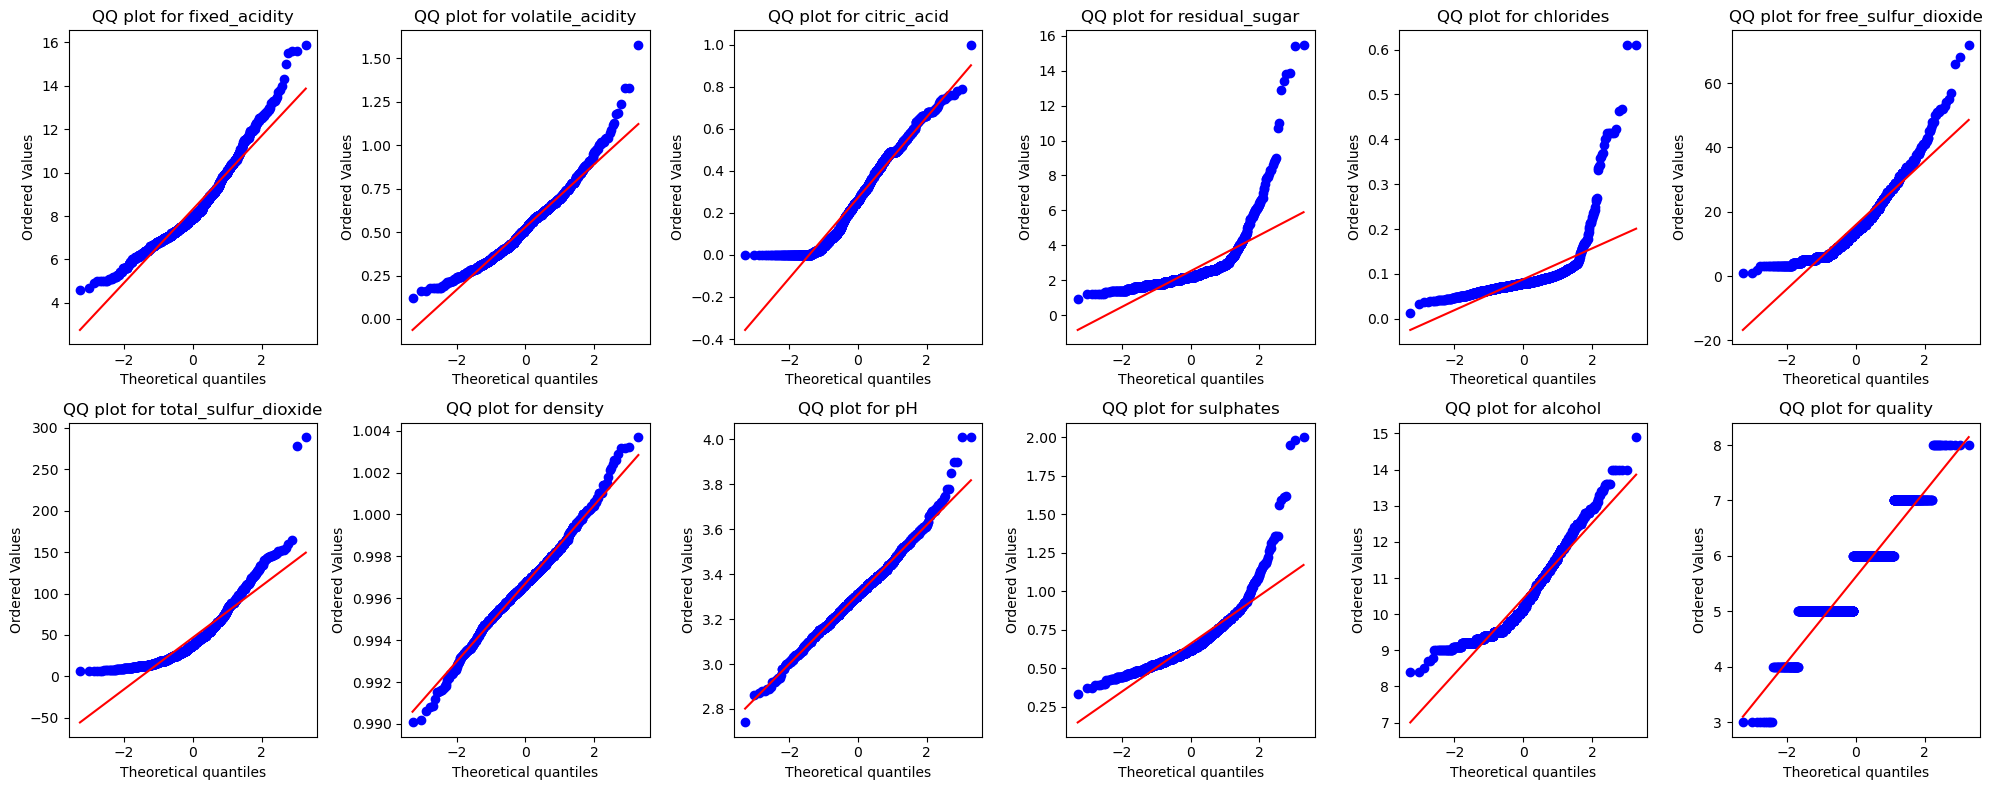

In [37]:
plot_qq(
    data_frame=df,
    features=df.columns
)

### Calculating Skewness

The skewness for each feature will be computed to quantify how much the distribution deviates from a normal distribution. A skewness value closer to zero indicates a more symmetric distribution.

In [38]:
skewness = df.skew().sort_values(ascending=False)
skewness

chlorides               5.502487
residual_sugar          4.548153
sulphates               2.406505
total_sulfur_dioxide    1.540368
free_sulfur_dioxide     1.226579
fixed_acidity           0.941041
alcohol                 0.859841
volatile_acidity        0.729279
citric_acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
dtype: float64

The skewness values for each feature have been calculated and displayed in descending order. According to the output, _chlorides_ has the highest skewness, indicating that it is the farthest from a normal distribution among all the features in this synthetic dataset, while _density_ has the least skewness.


### Data Transformation

Based on the findings from the QQ plots and skewness calculations, the Yeo-Johnson transformation normalization method will be applied to features exhibiting skewness greater than our established threshold of __1.0__, enhancing the linear regression model's efficacy by adhering to the normality assumption required for feature distributions.

In [39]:
features_with_high_skew = skewness[skewness > 1].index.tolist()

#### Data Transformation For Predicting Quality

The new dataframe will include all features required for the quality prediction model, with only those features demonstrating skewness above the threshold of 1.0 being transformed.

__Note__: The transformation should not be applied to the target variable. Since in this case the 'quality' skewness is lower than the threshold, the feature is not additionally removed.

In [40]:
df_quality = df.copy()

df_quality_transformed = apply_yeo_johnson(
    data_frame=df_quality,
    features=features_with_high_skew
)

To evaluate the effectiveness of the transformations, a subsequent visualization and recalculate skewness will be performed.

In [41]:
df_quality_transformed_skewness = df_quality_transformed.skew().sort_values(ascending=False)
df_quality_transformed_skewness

fixed_acidity           0.941041
alcohol                 0.859841
volatile_acidity        0.729279
citric_acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
sulphates               0.014637
residual_sugar         -0.001715
total_sulfur_dioxide   -0.003897
free_sulfur_dioxide    -0.009899
chlorides              -0.061923
dtype: float64

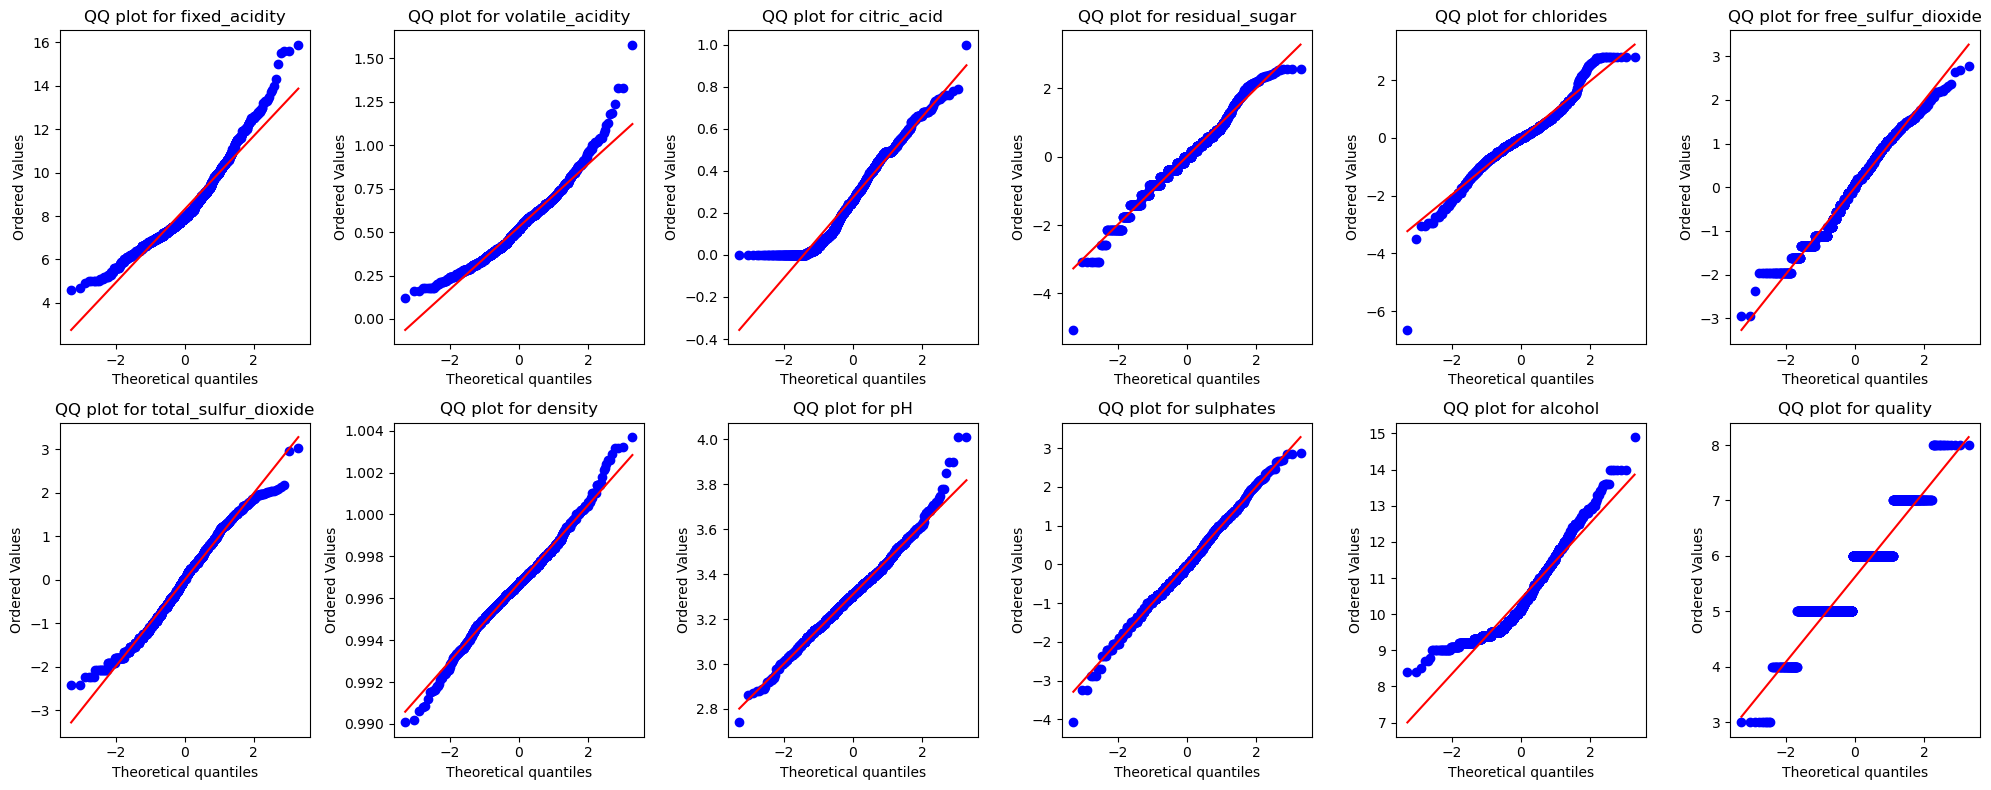

In [42]:
plot_qq(
    data_frame=df_quality_transformed,
    features=df_quality_transformed.columns
)

After applying the Yeo-Johnson transformation method to reduce skewness, the features exhibit a more normal distribution as evidenced by the QQ plots. However, some features, such as chlorides, according to the QQ plots, have not achieved full normalization.

#### Data Transformation For Predicting Alcohol Content

The new dataframe will include all features required for the quality prediction model, with only those features demonstrating skewness above the threshold of 1.0 being transformed.

__Note__: The transformation should not be applied to the target variable. Since in this case the 'alcohol' skewness is lower than the threshold, the feature is not additionally removed. However, since 'quality' is a derived parameter based on sensor data, it will not be used.

In [43]:
df_alcohol = df.copy()
df_alcohol = df_alcohol.drop('quality', axis=1)

df_alcohol_transformed = apply_yeo_johnson(
    data_frame=df_alcohol,
    features=features_with_high_skew
)

To evaluate the effectiveness of the transformations, a subsequent visualization and recalculate skewness will be performed.

In [44]:
df_alcohol_transformed_skewness = df_alcohol_transformed.skew().sort_values(ascending=False)
df_alcohol_transformed_skewness

fixed_acidity           0.941041
alcohol                 0.859841
volatile_acidity        0.729279
citric_acid             0.312726
pH                      0.232032
density                 0.044778
sulphates               0.014637
residual_sugar         -0.001715
total_sulfur_dioxide   -0.003897
free_sulfur_dioxide    -0.009899
chlorides              -0.061923
dtype: float64

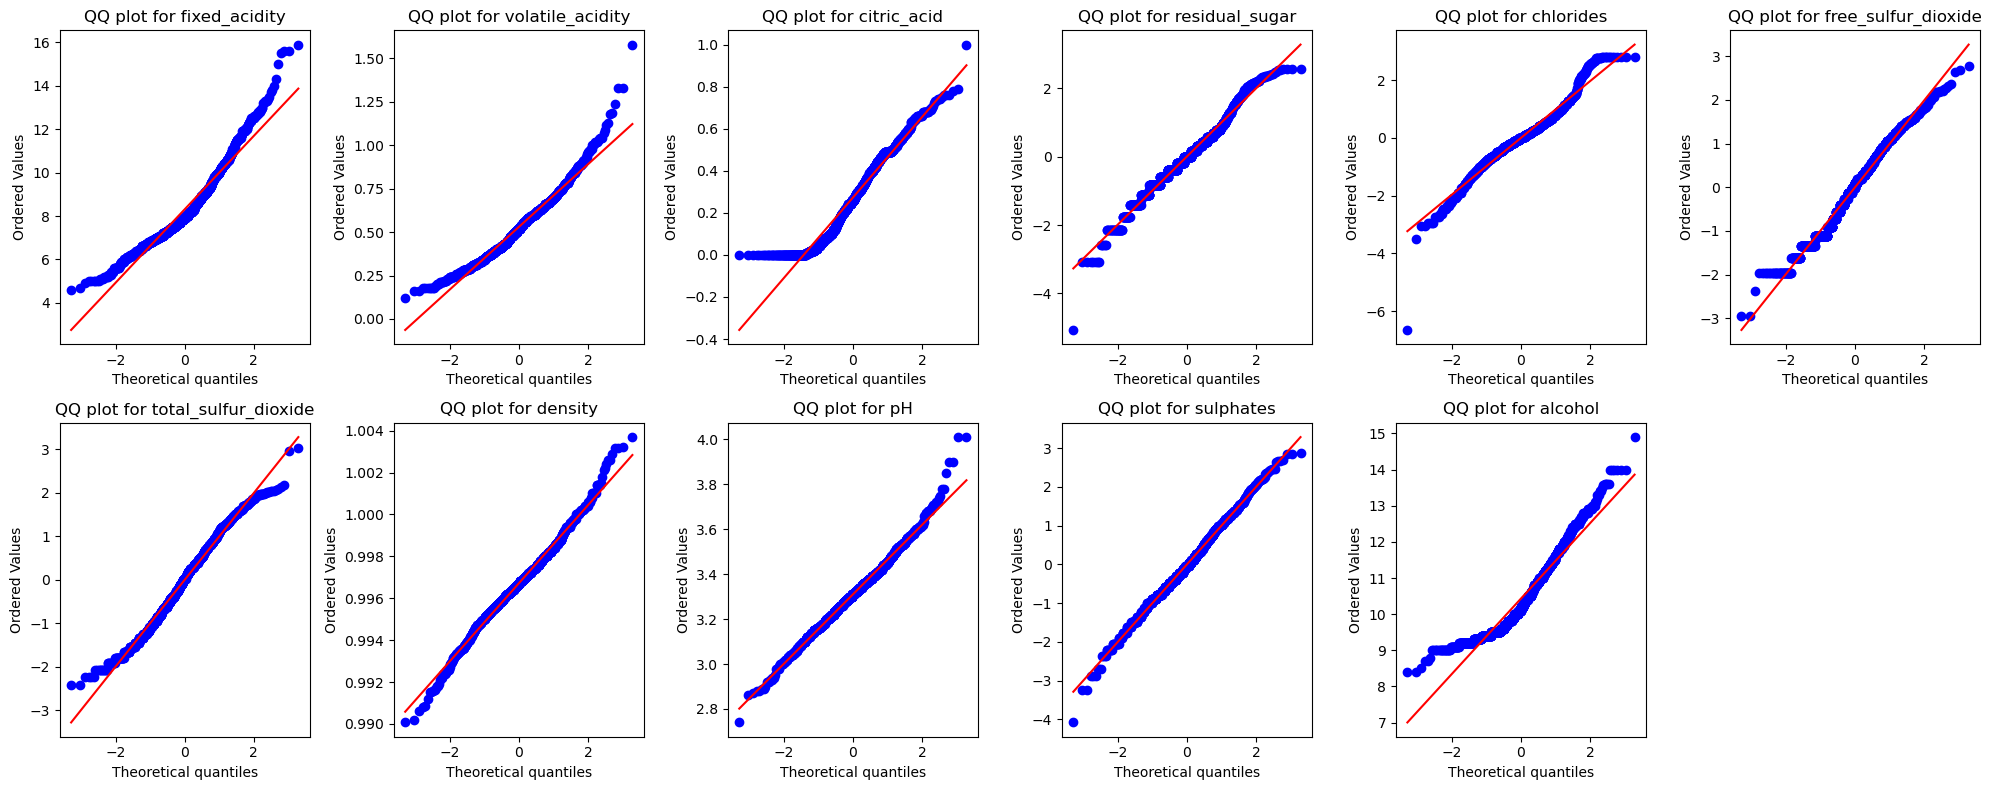

In [45]:
plot_qq(
    data_frame=df_alcohol_transformed,
    features=df_alcohol_transformed.columns
)

After applying the Yeo-Johnson transformation method to reduce skewness, the features exhibit a more normal distribution as evidenced by the QQ plots.

## Quality Prediction Model Development

Following the comprehensive data preparation phase, which included handling missing values, eliminating duplicates, and adjusting for skewness, the next step is the development of a linear regression model. This process is supported by careful selection of features, guided by correlation analysis and hypothesis testing, to enhance the model's accuracy and reliability.

### Data Splitting

In this section, __X_quality__ and __y_quality__ are defined as the feature set and target variable, respectively, for the quality prediction model. These datasets are then split into training and testing sets. This step is a important to train the model and assess its performance effectively, ensuring its ability to generalize to unseen data.

__Note__: The dataset is sufficiently large but not excessively so, a split ratio of __80%__ for training and __20%__ for testing will be chosen.

In [46]:
X_quality = df_quality_transformed[quality_predictor_variables]
y_quality = df_quality_transformed['quality']

X_quality_train, X_quality_test, y_quality_train, y_quality_test = train_test_split(
    X_quality, y_quality, test_size=0.2, random_state=42
)

In [47]:
print(f"In the following analysis, after splitting the entire dataset of wine samples, "
      f"{X_quality_train.shape[0]} samples will be used for training the model, "
      f"while {X_quality_test.shape[0]} samples will be reserved for model testing."
)

In the following analysis, after splitting the entire dataset of wine samples, 1087 samples will be used for training the model, while 272 samples will be reserved for model testing.


Before advancing to further steps in model development, the distribution of quality scores within the subsets designated for model training and testing is examined.

In [48]:
score_counts_train = y_quality_train.value_counts().sort_index()
quality_score_table_train = score_counts_train.to_frame().reset_index()
quality_score_table_train.columns = ['Quality Score', 'Samples from Training Dataset']

score_counts_test = y_quality_test.value_counts().sort_index()
quality_score_table_test = score_counts_test.to_frame().reset_index()
quality_score_table_test.columns = ['Quality Score', 'Samples from Test Dataset']

quality_score_table = pd.merge(
    quality_score_table_train,
    quality_score_table_test,
    on='Quality Score',
    how='outer'
)
quality_score_table.set_index('Quality Score', inplace=True)

quality_score_table

Samples from Training Dataset  Samples from Test Dataset
Quality Score                                                          
3                                          6                          4
4                                         42                         11
5                                        457                        120
6                                        432                        103
7                                        136                         31
8                                         14                          3

### Model Initialization and Training

A LinearRegression model is created and trained on the dataset using training predictor and target variables to learn their relationship.

In [49]:
quality_model = LinearRegression()
quality_model.fit(X_quality_train, y_quality_train)

LinearRegression()

### Model Evaluation

In this section, the predictive accuracy of the linear regression model is assessed using key performance metrics and diagnostic plots. The Mean Squared Error (__MSE__) and Root Mean Squared Error (__RMSE__) reflect the average magnitude of the errors, while the __R-squared__ value measures how much variance in the target variable the model accounts for.

Mean Squared Error (MSE): 0.41361579719657854
Root Mean Squared Error (RMSE): 0.6431296892513815
R-squared (R2): 0.4160903860211105


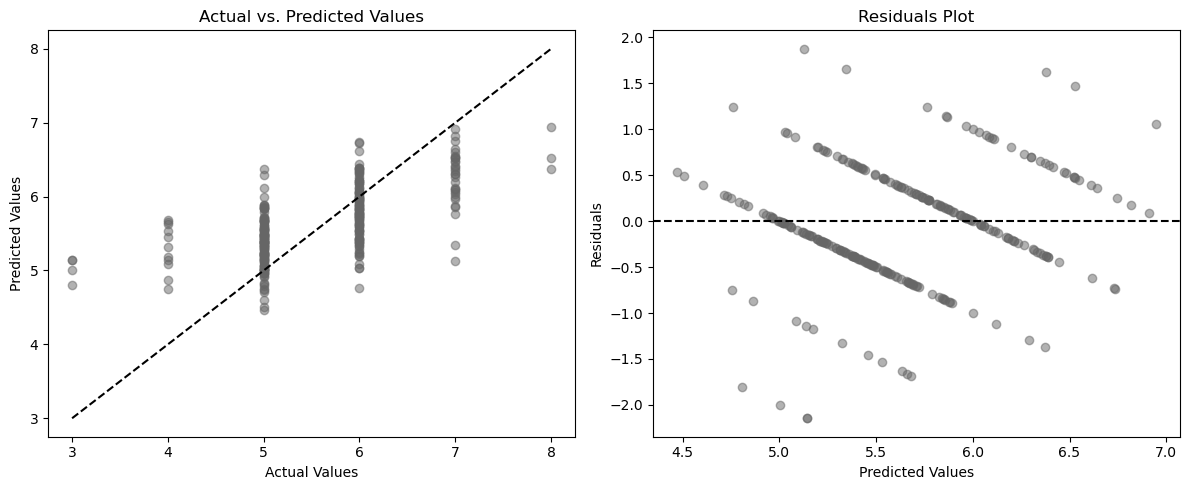

In [50]:
evaluate_linear_model(
    model=quality_model,
    X_test=X_quality_test,
    y_test=y_quality_test
)

To thoroughly assess the performance of our model and ensure its robustness across different subsets of data, a cross-validation with 10 folds will be conducted. This method partitions the dataset into 10 distinct training and testing sets, allowing to evaluate the model's effectiveness using the coefficient of determination (R-squared) as the criterion. By averaging the scores obtained from each fold, a comprehensive understanding of the model's predictive accuracy will be gained.

In [51]:
quality_model_scores = cross_val_score(
    estimator=quality_model,
    X=X_quality,
    y=y_quality,
    cv=10,
    scoring='r2'
)

In [52]:
print(f"R-squared scores for each fold: \n {quality_model_scores}\n\n"
      f"Average R-squared across all folds: {quality_model_scores.mean()}"
)

R-squared scores for each fold: 
 [-0.06146472  0.38475048  0.27485133  0.40276267 -0.05649029  0.40159522
  0.32402348  0.45566912  0.26501426  0.3255344 ]

Average R-squared across all folds: 0.2716245954130625


__Analytical observations of model performance__:
* The R-squared value of approximately 0.42 indicates that roughly __42%__ of the variance in the target variable can be explained by the model's inputs.
* After cross-validation with 10 folds, the mean accuracy of the model decreases significantly to approximately __27%__. This reduction may indicate overfitting, suggesting the model could be too complex, or that data variability introduces excessive noise, affecting the model's generalizability.
* From the plots, it is evident that the model has a tendency to predict medium values with greater accuracy, while it struggles to accurately predict very low (e.g., ≤4) and high (e.g., ≥7) values, which are consistently missed.

Model results are saved for comparison of subsequent versions:

In [53]:
y_quality_pred = quality_model.predict(X_quality_test)
quality_model_r2 = r2_score(y_quality_test, y_quality_pred)
quality_model_mse = mean_squared_error(y_quality_test, y_quality_pred)
quality_model_rmse = np.sqrt(quality_model_mse)

In [54]:
quality_model_summary = pd.DataFrame({
    "Version": ["0"],
    "Description": ["Initial model"],
    "R-squared": [quality_model_r2],
    "Difference": [0.0]
})

### Model Refinement

After initially employing LinearRegression for predictive insights, a deeper statistical analysis will be conducted using a statsmodels __OLS__ (Ordinary Least Squares) Regression model. This method will reveal more detailed statistical information about the predictors, thereby aiding in the development of an improved model designed to yield better outcomes through a more informed selection and refinement of features.

__Note__:  Results from statsmodels' OLS (Ordinary Least Squares) and scikit-learn's LinearRegression can slightly differ, due to differences in the default handling of the intercept, variations in the underlying numerical algorithms, discrepancies in data preprocessing steps.

In [55]:
X_quality_const = sm.add_constant(X_quality_train)
quality_model_ols = sm.OLS(y_quality_train, X_quality_const).fit()

The new model will be evaluated using the test dataset, consisting of previously unseen data, and the R-squared, Mean Squared Error and Mean Absolute Error values will be calculated to assess the model's predictive accuracy for test dataset.

In [56]:
X_quality_test_const = sm.add_constant(X_quality_test)
y_quality_pred_test = quality_model_ols.predict(X_quality_test_const)

mse_test_quality = mean_squared_error(y_quality_test, y_quality_pred_test)
rmse_test_quality = np.sqrt(mse_test_quality)
r2_test_quality = r2_score(y_quality_test, y_quality_pred_test)

In [57]:
print(
    f'Parameters defining the accuracy of the Quality Prediction Model : \n '
    f'Mean Squared Error (MSE): {mse_test_quality}  \n '
    f'Root Mean Squared Error (RMSE): {rmse_test_quality}\n '
    f'R-squared (R2): {r2_test_quality}'
)

Parameters defining the accuracy of the Quality Prediction Model : 
 Mean Squared Error (MSE): 0.41361579719659836  
 Root Mean Squared Error (RMSE): 0.6431296892513969
 R-squared (R2): 0.4160903860210825


In [58]:
quality_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     76.66
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          4.74e-100
Time:                        22:00:57   Log-Likelihood:                -1079.3
No. Observations:                1087   AIC:                             2177.
Df Residuals:                    1078   BIC:                             2222.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.0389     15.146     -0.399      0.690     -35.758      23.680
volatile_acidity        -0.9949      0.145     -6.847      0.000      -1.280      -0.710
citric_acid             -0.3737      0.163     -2.286      0.022      -0.694      -0.053
chlorides               -0.0867      0.023     -3.739      0.000      -0.132      -0.041
total_sulfur_dioxide    -0.0631      0.021     -3.033      0.002      -0.104      -0.022
density                 11.7121     15.087      0.776      0.438     -17.890      41.315
pH                      -0.7235      0.167     -4.320      0.000      -1.052      -0.395
sulphates                0.1864      0.023      8.211      0.000       0.142       0.231
alcohol                  0.2899      0.025     11.497      0.000       0.240       0.339
==============================================================================
Omnibus:                       21.344   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.731
Skew:                          -0.221   Prob(JB):                     5.77e-07
Kurtosis:                       3.662   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Analytical observations and steps for improvement__:
1. __Balance Data__: Employ the SMOTE technique to generate synthetic samples for underrepresented quality scores, enhancing the balance of the training dataset and  trying to improve the model's ability to learn from all categories.
2. __Remove Non-Significant Features__: Eliminate variables with high p-values (e.g., density) to streamline the model while maintaining its explanatory power.
3. __Normalize Data__: Apply StandardScaler() to ensure uniform feature scaling, which can also help to reduce numerical issues.
4. __Identification and Removal of Outliers__:  Employ Z-score method to detect and exclude potential outliers from the dataset.
5. __Round Predictions__: For accuracy metrics, round predictions to integer values, aligning with the dataset's actual quality ratings.
6. __Default Feature Baseline Model__: Construct a baseline model using the default set of features (with no eliminations) to establish a reference point.

#### Data Balancing

To ensure a more balanced training dataset and provide a fair opportunity for the model to learn from all quality scores, the __SMOTE__ (Synthetic Minority Over-sampling Technique) technique will be employed. SMOTE works by interpolating between existing samples of the minority classes.

In [59]:
smote = SMOTE(random_state=42)

X_quality_train_resampled, y_quality_train_resampled = smote.fit_resample(
    X_quality_train, y_quality_train
)

In the following updated table, the distribution of quality scores within the subsets designated for model training and testing is examined.

In [60]:
score_counts_train_resampled = y_quality_train_resampled.value_counts().sort_index()
quality_score_table_train_resampled = score_counts_train_resampled.to_frame().reset_index()
quality_score_table_train_resampled.columns = ['Quality Score', 'Samples from Training Dataset (Resampled)']

quality_score_table_summary = pd.merge(
    quality_score_table,
    quality_score_table_train_resampled,
    on='Quality Score',
    how='outer'
)
quality_score_table_summary.set_index('Quality Score', inplace=True)

quality_score_table_summary

Samples from Training Dataset  Samples from Test Dataset  \
Quality Score                                                             
3                                          6                          4   
4                                         42                         11   
5                                        457                        120   
6                                        432                        103   
7                                        136                         31   
8                                         14                          3   

               Samples from Training Dataset (Resampled)  
Quality Score                                             
3                                                    457  
4                                                    457  
5                                                    457  
6                                                    457  
7                                                    457  
8                                                    457

The new version (__v1__) of model will be created to make predictions on the test set and assess the impact of modifications.

In [61]:
quality_model_v1 = LinearRegression()
quality_model_v1.fit(X_quality_train_resampled, y_quality_train_resampled)

LinearRegression()

As the initial model, the improved version will be evaluated using key performance metrics and diagnostic plots.

Mean Squared Error (MSE): 0.8552676798795585
Root Mean Squared Error (RMSE): 0.9248068338196678
R-squared (R2): -0.2073983251895597


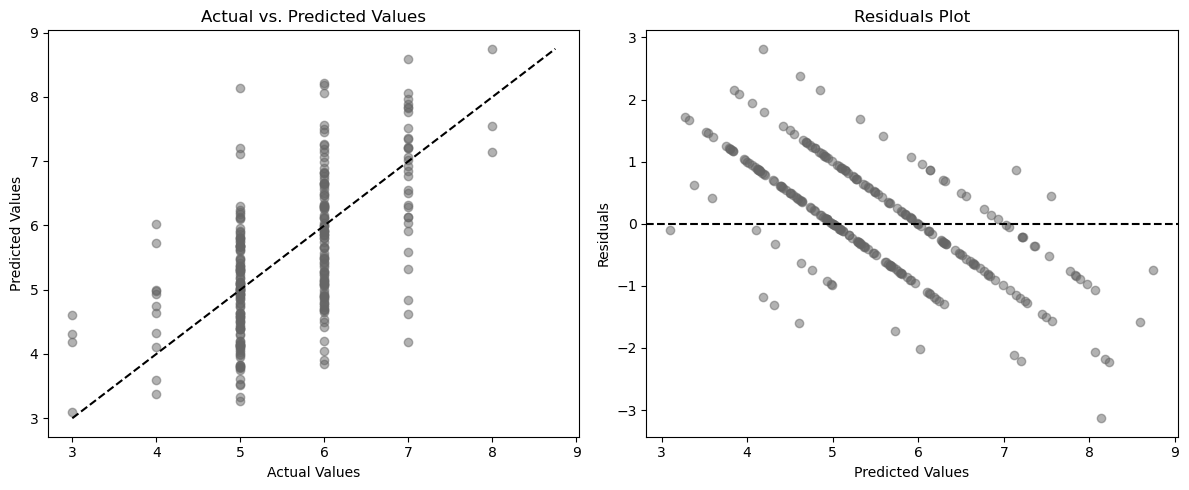

In [62]:
evaluate_linear_model(quality_model_v1, X_quality_test, y_quality_test)

__Conclusion__: A negative R-squared indicates that the model fits the data worse than a horizontal line at the mean of the dependent variable and the resampling has not led to an improvement in predictive ability on unseen data. It may also indicate overfitting during the training phase, meaning the model learned the noise in the training data rather than the underlying trend and performs poorly on new, unseen data.

However, model results are saved for comparison of subsequent versions:

In [63]:
y_quality_v1_pred = quality_model_v1.predict(X_quality_test)
quality_model_v1_r2 = r2_score(y_quality_test, y_quality_v1_pred)

In [64]:
quality_model_v1_summary = pd.DataFrame({
    "Version": ["1"],
    "Description": ["Model with Resampled dataset"],
    "R-squared": [quality_model_v1_r2],
    "Difference": -quality_model_r2+quality_model_v1_r2
})

In [65]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v1_summary],
    ignore_index=True
)

#### Identifying and Removing Non-Significant Features

To identify and remove non-significant features, hypothesis testing will be used, which evaluates the significance of features through p-values.

__Null Hypothesis__ (H0): There is no relationship between a feature and the target variable.

__Alternative Hypothesis__ (Ha): There is a significant relationship between a feature and a target variable.

Features are considered for removal if their p-values exceed a Significance Level (α) which is chosen to be equal to 0.05, indicating insufficient evidence to reject the null hypothesis, thus deeming them non-significant to the model.

In [66]:
updated_quality_predictor_variables = quality_predictor_variables.copy()
updated_quality_predictor_variables.remove('density')

The new version (__v2__) of OLS regression model will be created to assess the impact of modifications.

First, variables for model are defined and splitted into training and testing sets:

In [67]:
X_quality_v2 = df_quality_transformed[updated_quality_predictor_variables]
y_quality_v2 = df_quality_transformed['quality']

X_quality_train_v2, X_quality_test_v2, y_quality_train_v2, y_quality_test_v2 = train_test_split(
    X_quality_v2, y_quality_v2, test_size=0.2, random_state=42
)

Second, constant for intercepts is added and the model is fitted:

In [68]:
X_quality_train_const_v2 = sm.add_constant(X_quality_train_v2)

quality_model_ols_v2 = sm.OLS(y_quality_train_v2, X_quality_train_const_v2).fit()

In [69]:
quality_model_ols_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     87.56
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.57e-101
Time:                        22:00:58   Log-Likelihood:                -1079.6
No. Observations:                1087   AIC:                             2175.
Df Residuals:                    1079   BIC:                             2215.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7109      0.570     10.025      0.000       4.593       6.829
volatile_acidity        -0.9707      0.142     -6.841      0.000      -1.249      -0.692
citric_acid             -0.3215      0.149     -2.158      0.031      -0.614      -0.029
chlorides               -0.0841      0.023     -3.666      0.000      -0.129      -0.039
total_sulfur_dioxide    -0.0642      0.021     -3.095      0.002      -0.105      -0.023
pH                      -0.7229      0.167     -4.317      0.000      -1.051      -0.394
sulphates                0.1892      0.022      8.448      0.000       0.145       0.233
alcohol                  0.2798      0.022     12.962      0.000       0.237       0.322
==============================================================================
Omnibus:                       20.807   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.843
Skew:                          -0.218   Prob(JB):                     8.99e-07
Kurtosis:                       3.651   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For comparative analysis, a new model will be developed using the __LinearRegression()__ method and its performance metrics will be added to the DataFrame alongside the initial model version for clear comparison.

In [70]:
quality_model_v2 = LinearRegression()
quality_model_v2.fit(X_quality_train_v2, y_quality_train_v2)

y_quality_pred_v2 = quality_model_v2.predict(X_quality_test_v2)
quality_model_v2_r2 = r2_score(y_quality_test_v2, y_quality_pred_v2)

In [71]:
quality_model_v2_r2_diff = quality_model_v2_r2 - quality_model_r2

In [72]:
quality_model_v2_summary = pd.DataFrame({
    "Version": ["2"],
    "Description": ["Model without Non-Significant Features"],
    "R-squared": [quality_model_v2_r2],
    "Difference": [quality_model_v2_r2_diff]
})

In [73]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v2_summary],
    ignore_index=True
)

In [74]:
print(
    f"After removing non-significant features, the recalculated R-squared difference is {quality_model_v2_r2_diff}. "
    f"This represents a small but notable increase in the model's ability to explain the variance in the target variable. "
)

After removing non-significant features, the recalculated R-squared difference is 0.001933512684065386. This represents a small but notable increase in the model's ability to explain the variance in the target variable. 


__Conclusion__: The removal of non-significant features led to a slight improvement in the model's explanatory capability.

#### Feature Scaling

The _StandardScaler()_ will be applied to ensure uniform feature scaling, and a third version of the model, referred to as __v3__, will also be developed.

First, variables for model are defined and splitted into training and testing sets:

In [75]:
X_quality_v3 = df_quality_transformed[quality_predictor_variables]
y_quality_v3 = df_quality_transformed['quality']

X_quality_train_v3, X_quality_test_v3, y_quality_train_v3, y_quality_test_v3 = train_test_split(
    X_quality_v3, y_quality_v3, test_size=0.2, random_state=42
)

Second, StandardScaler is initialized and fitted and transformed the training data as well as and test sets:

In [76]:
scaler = StandardScaler()

X_quality_train_v3_scaled = scaler.fit_transform(X_quality_train_v3)
X_quality_test_v3_scaled = scaler.transform(X_quality_test_v3)

Third, the new version of model is developed and key performance metrics are calculated:

In [77]:
quality_model_v3 = LinearRegression()
quality_model_v3.fit(X_quality_train_v3_scaled, y_quality_train_v3)

y_quality_pred_v3 = quality_model_v3.predict(X_quality_test_v3_scaled)
quality_model_v3_r2 = r2_score(y_quality_test_v3, y_quality_pred_v3)

In [78]:
quality_model_v3_r2_diff = quality_model_v3_r2 - quality_model_r2

In [79]:
quality_model_v3_summary = pd.DataFrame({
    "Version": ["3"],
    "Description": ["Model with Standard Scaling"],
    "R-squared": [quality_model_v3_r2],
    "Difference": [quality_model_v3_r2_diff]
})

In [80]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v3_summary],
    ignore_index=True
)

In [81]:
print(
    f"After applying StandardScaler() to ensure uniform feature scaling ,"
    f"the recalculated R-squared difference is {quality_model_v3_r2_diff}. "
)

After applying StandardScaler() to ensure uniform feature scaling ,the recalculated R-squared difference is -4.440892098500626e-16. 


__Conclution__: The implementation of StandardScaler for uniform feature scaling has maintained the model's explanatory power, with the minor difference in R-squared suggesting minor impact on predictive accuracy. 

#### Identification and Removal of Outliers

In this section, the Z-score method will be used to detect and exclude outliers from the dataset. By establishing a threshold value (chosen as 3), observations with a Z-score exceeding this limit will be evaluated and classified as outliers. This statistical measure calculates the number of standard deviations each observation is from the mean, and those significantly distant from the mean are removed, allowing for the refinement of the model with more representative data.

In [82]:
df_cleaned = remove_outliers(
    data_frame=df.drop('quality', axis=1),
    threshold=3
)

df_cleaned['quality'] = df['quality']

In [83]:
print(f"After applying the Z-score method, {df_cleaned.shape[0]} samples remianed out of {df.shape[0]}.") 

After applying the Z-score method, 1239 samples remianed out of 1359.


After removal of potential outliers, variables for model are defined and splitted into training and testing sets:

In [84]:
X_quality_v4 = df_cleaned[updated_quality_predictor_variables]
y_quality_v4 = df_cleaned['quality']

X_quality_train_v4, X_quality_test_v4, y_quality_train_v4, y_quality_test_v4 = train_test_split(
    X_quality_v4, y_quality_v4, test_size=0.2, random_state=42
)

A new version of model is developed and key performance metrics are calculated:

In [85]:
quality_model_v4 = LinearRegression()
quality_model_v4.fit(X_quality_train_v4, y_quality_train_v4)

y_quality_pred_v4 = quality_model_v4.predict(X_quality_test_v4)
quality_model_v4_r2 = r2_score(y_quality_test_v4, y_quality_pred_v4)

In [86]:
quality_model_v4_r2_diff = quality_model_v4_r2 - quality_model_r2

In [87]:
print(f"After removing potential outliers, the recalculated R-squared difference is {quality_model_v4_r2_diff}. ")

After removing potential outliers, the recalculated R-squared difference is -0.07244990315587385. 


In [88]:
quality_model_v4_summary = pd.DataFrame({
    "Version": ["4"],
    "Description": ["Model with Potential Outliers Removed"],
    "R-squared": [quality_model_v4_r2],
    "Difference": [quality_model_v4_r2_diff]
})

In [89]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v4_summary],
    ignore_index=True
)

__Conclution__: The use of Z-score method for identifying and eliminating potential outliers from the dataset has led to a reduction in the model's explanatory power. This suggests that it has unintentionally removed information that was valuable for predicting the target variable. 

#### Prediction Rounding for Accuracy Improvement

In this section, predictions will be rounded to integer values for the purpose of accuracy metrics, thereby ensuring alignment with the dataset's actual quality ratings.

__Note__: Evaluating that the previously mentioned improvements did not yield benefits, this model development will employ LinearRegression from sklearn.linear_model.

Mean Squared Error (MSE) with Rounded Predictions: 0.5073529411764706
Root Mean Squared Error (RMSE) with Rounded Predictions: 0.7122871199007256
R-squared (R2) with Rounded Predictions: 0.28375980307974136


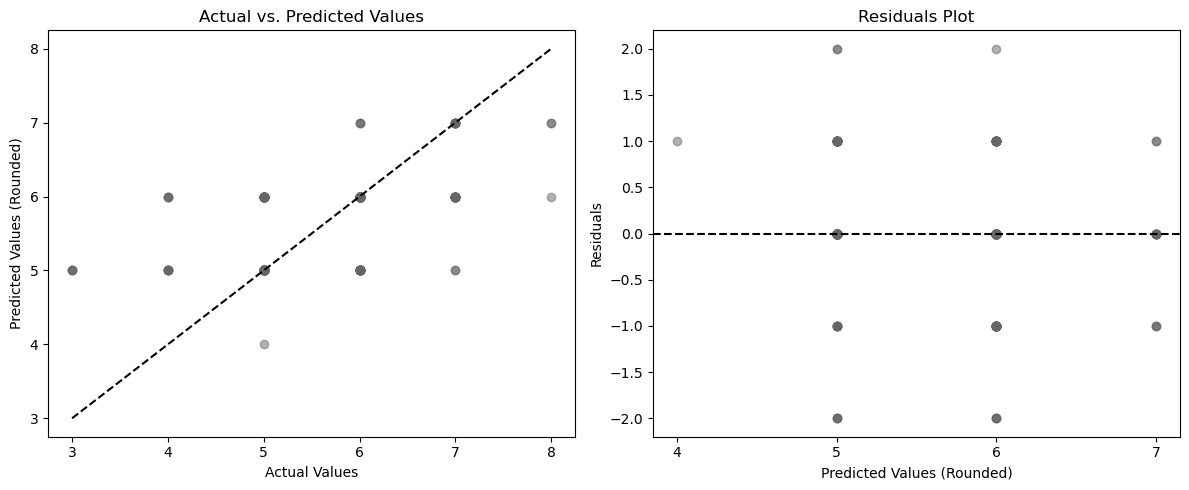

In [90]:
evaluate_linear_model_rounded(
    model=quality_model,
    X_test=X_quality_test,
    y_test=y_quality_test
)

In [91]:
y_quality_pred_v5 = np.round(quality_model.predict(X_quality_test))
quality_model_v5_r2 = r2_score(y_quality_test, y_quality_pred_v5)

In [92]:
quality_model_v5_r2_diff = quality_model_v5_r2 - quality_model_r2

In [93]:
print(f"After rounding prediction, the recalculated R-squared difference is {quality_model_v5_r2_diff}. ")

After rounding prediction, the recalculated R-squared difference is -0.13233058294136912. 


In [94]:
quality_model_v5_summary = pd.DataFrame({
    "Version": ["5"],
    "Description": ["Model with Rounded Prediction"],
    "R-squared": [quality_model_v5_r2],
    "Difference": [quality_model_v5_r2_diff]
})

In [95]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v5_summary],
    ignore_index=True
)

__Conclusion__: The adjustment to round predictions to integers, reflecting the discrete nature of the quality scores, resulted in a notable decrease in the model's explanatory power as evidenced by the reduction in R-squared.

#### Default Feature Baseline Model

In this section a baseline model using the default set of features (with no eliminations) will be constructed and will serve as a benchmark to assess the impact of feature selection and other preprocessing steps on predictive performance. It will also allow for the evaluation of how each feature, regardless of its individual correlation with the target, contributes to the collective predictive accuracy.

__Notes__: 
* Even predictors with weak Pearson correlation coefficients to the target variable, like "_fixed_acidity_" to "_alcohol_," may hold latent value, potentially enhancing model accuracy through non-linear relationships or interactions with other variables. While highly correlated features often risk multicollinearity, they may explain unique variance in the target.
* Moreover, there exists a risk of committing a Type I error in hypothesis testing, where a potentially significant predictor is overlooked by failing to reject the null hypothesis. 

In [96]:
X_quality_v6 = df_quality_transformed.drop('quality', axis=1)
y_quality_v6 = df_quality_transformed['quality']

X_quality_train_v6, X_quality_test_v6, y_quality_train_v6, y_quality_test_v6 = train_test_split(
    X_quality_v6, y_quality_v6, test_size=0.2, random_state=42
)

In [97]:
X_quality_train_const_v6 = sm.add_constant(X_quality_train_v6)

quality_model_ols_v6 = sm.OLS(y_quality_train_v6, X_quality_train_const_v6).fit()
quality_model_ols_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     56.21
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           3.58e-98
Time:                        22:00:58   Log-Likelihood:                -1077.2
No. Observations:                1087   AIC:                             2178.
Df Residuals:                    1075   BIC:                             2238.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5044     28.690      0.157      0.875     -51.790      60.799
fixed_acidity            0.0069      0.031      0.221      0.825      -0.054       0.068
volatile_acidity        -0.9522      0.147     -6.477      0.000      -1.241      -0.664
citric_acid             -0.3330      0.172     -1.937      0.053      -0.670       0.004
residual_sugar           0.0193      0.028      0.694      0.488      -0.035       0.074
chlorides               -0.0861      0.024     -3.634      0.000      -0.133      -0.040
free_sulfur_dioxide      0.0651      0.034      1.926      0.054      -0.001       0.131
total_sulfur_dioxide    -0.1180      0.035     -3.347      0.001      -0.187      -0.049
density                  1.1659     29.122      0.040      0.968     -55.976      58.307
pH                      -0.7064      0.231     -3.052      0.002      -1.161      -0.252
sulphates                0.1875      0.024      7.959      0.000       0.141       0.234
alcohol                  0.2728      0.035      7.810      0.000       0.204       0.341
==============================================================================
Omnibus:                       22.708   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.548
Skew:                          -0.223   Prob(JB):                     1.41e-07
Kurtosis:                       3.706   Cond. No.                     2.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression results summary, some features can be noticed with a p-value higher than 0.05, it may indicate that there is not a statistically significant relationship between those features and the target variable—at least within the context of the model. Also, these
features might have a high p-value due to multicollinearity with other features, which can have an effect on large condition number.

In [98]:
quality_model_v6 = LinearRegression()
quality_model_v6.fit(X_quality_train_v6, y_quality_train_v6)

y_quality_pred_v6 = quality_model_v6.predict(X_quality_test_v6)
quality_model_v6_r2 = r2_score(y_quality_test_v6, y_quality_pred_v6)

In [99]:
quality_model_v6_r2_diff = quality_model_v6_r2 - quality_model_r2

In [100]:
quality_model_v6_summary = pd.DataFrame({
    "Version": ["6"],
    "Description": ["Default Feature Baseline Model"],
    "R-squared": [quality_model_v6_r2],
    "Difference": [quality_model_v6_r2_diff]
})

In [101]:
print(f"After rounding prediction, the recalculated R-squared difference is {quality_model_v6_r2_diff}. ")

After rounding prediction, the recalculated R-squared difference is 0.0008733965298654001. 


In the next step, an attempt will be made to improve the model by removing features of questionable benefit.

In [102]:
quality_non_significant_features = ['fixed_acidity',
                                    'citric_acid',
                                    'residual_sugar',
                                    'free_sulfur_dioxide',
                                    'density'
                                   ]

Accordingly, a model version 6 will be updated by removing non significant features accordingly.

In [103]:
X_quality_v7 = X_quality_v6.drop(quality_non_significant_features, axis=1)
y_quality_v7 = df_quality_transformed['quality']

X_quality_train_v7, X_quality_test_v7, y_quality_train_v7, y_quality_test_v7 = train_test_split(
    X_quality_v7, y_quality_v7, test_size=0.2, random_state=42
)

X_quality_train_const_v7 = sm.add_constant(X_quality_train_v7)

quality_model_ols_v7 = sm.OLS(y_quality_train_v7, X_quality_train_const_v7).fit()
quality_model_ols_v7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.27e-101
Time:                        22:00:58   Log-Likelihood:                -1082.0
No. Observations:                1087   AIC:                             2178.
Df Residuals:                    1080   BIC:                             2213.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.0578      0.483     10.462      0.000       4.109       6.006
volatile_acidity        -0.8341      0.127     -6.557      0.000      -1.084      -0.584
chlorides               -0.0919      0.023     -4.053      0.000      -0.136      -0.047
total_sulfur_dioxide    -0.0676      0.021     -3.265      0.001      -0.108      -0.027
pH                      -0.5456      0.146     -3.732      0.000      -0.832      -0.259
sulphates                0.1812      0.022      8.189      0.000       0.138       0.225
alcohol                  0.2709      0.021     12.764      0.000       0.229       0.313
==============================================================================
Omnibus:                       23.201   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.190
Skew:                          -0.238   Prob(JB):                     1.69e-07
Kurtosis:                       3.679   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
quality_model_v7 = LinearRegression()
quality_model_v7.fit(X_quality_train_v7, y_quality_train_v7)

y_quality_pred_v7 = quality_model_v7.predict(X_quality_test_v7)
quality_model_v7_r2 = r2_score(y_quality_test_v7, y_quality_pred_v7)

In [105]:
quality_model_v7_r2_diff = quality_model_v7_r2 - quality_model_r2

In [106]:
quality_model_v7_summary = pd.DataFrame({
    "Version": ["7"],
    "Description": ["Baseline Model (v6) with Significant Features"],
    "R-squared": [quality_model_v7_r2],
    "Difference": [quality_model_v7_r2_diff]
})

In [107]:
quality_model_summary = pd.concat(
    [quality_model_summary, quality_model_v6_summary, quality_model_v7_summary],
    ignore_index=True
)

In [108]:
print(f"After rounding prediction, the recalculated R-squared difference is {quality_model_v7_r2_diff}. ")

After rounding prediction, the recalculated R-squared difference is -0.0005291868957341128. 


__Conclution__: 
* The baseline model demonstrates a slight but positive improvement in prediction accuracy with an R-squared difference of roughly 0.000873. However, such a minimal gain must be weighed against potential drawbacks, as an indiscriminate inclusion of features could lead to significant noise and multicollinearity, negatively impacting the model's reliability and interpretability. 
* After the removal of statistically insignificant features as indicated by the OLS summary, a slight decrease in performance is observed, with an R-squared difference of -0.000529 compared to the initial model. This underscores the complexity of feature selection, where enhancing the model's predictive accuracy is balanced against the risk of introducing noise and facing multicollinearity challenges.


### Final Quality Prediction Model

In this section model's various versions will be reviewed, with a focus on R-squared values to measure improvements. According to the difference of R-squared value with the initial version of the model, what improvements will be used in finalizing the model will be chosen.

In [109]:
quality_model_summary

Version                                    Description  R-squared  \
0       0                                  Initial model   0.416090   
1       1                   Model with Resampled dataset  -0.207398   
2       2         Model without Non-Significant Features   0.418024   
3       3                    Model with Standard Scaling   0.416090   
4       4          Model with Potential Outliers Removed   0.343640   
5       5                  Model with Rounded Prediction   0.283760   
6       6                 Default Feature Baseline Model   0.416964   
7       7  Baseline Model (v6) with Significant Features   0.415561   

     Difference  
0  0.000000e+00  
1 -6.234887e-01  
2  1.933513e-03  
3 -4.440892e-16  
4 -7.244990e-02  
5 -1.323306e-01  
6  8.733965e-04  
7 -5.291869e-04

Based on a summary table above, strategies, such as resampling and removing potential outliers, not only did not improve explonatory power, but fairly decreased it. By constructing a default features baseline model, it was confirmed that the actions taken previously in selecting features demonstrated better results than those guided solely by the OLS model summary from statistical methods. Also, the ability of the model to predict the target variable was negatively affected by the rounding of the value. 

The sole variant that marginally improved the R-squared value was the __removal of non-significant features__. Although, the slight negative change resulting from the __use of StandardScaler__, though not enhancing the R-squared, could potentially contribute to a more stable and less noise-sensitive model.

For these reasons, the final model is created by applying the 2nd and 3rd tested model refinement variants.

Variables for final model are defined and splitted into training and testing sets:

In [110]:
X_quality_final = df_quality_transformed[updated_quality_predictor_variables]
y_quality_final = df_quality_transformed['quality']

X_quality_train_final, X_quality_test_final, y_quality_train_final, y_quality_test_final = (
    train_test_split(X_quality_final, y_quality_final, test_size=0.2, random_state=42)
)

StandardScaler is initialized and fitted and transformed the training and test datasets:

In [111]:
scaler = StandardScaler()

X_quality_train_final_scaled = scaler.fit_transform(X_quality_train_final)
X_quality_test_final_scaled = scaler.transform(X_quality_test_final)

A final version of model is developed andf key performance metrics are calculated:

In [112]:
quality_model_final = LinearRegression()
quality_model_final.fit(X_quality_train_final_scaled, y_quality_train_final)

y_quality_pred_final = quality_model_final.predict(X_quality_test_final_scaled)
quality_model_final_r2 = r2_score(y_quality_test_final, y_quality_pred_final)

Mean Squared Error (MSE): 0.41224618215503145
Root Mean Squared Error (RMSE): 0.6420640016034472
R-squared (R2): 0.418023898705176


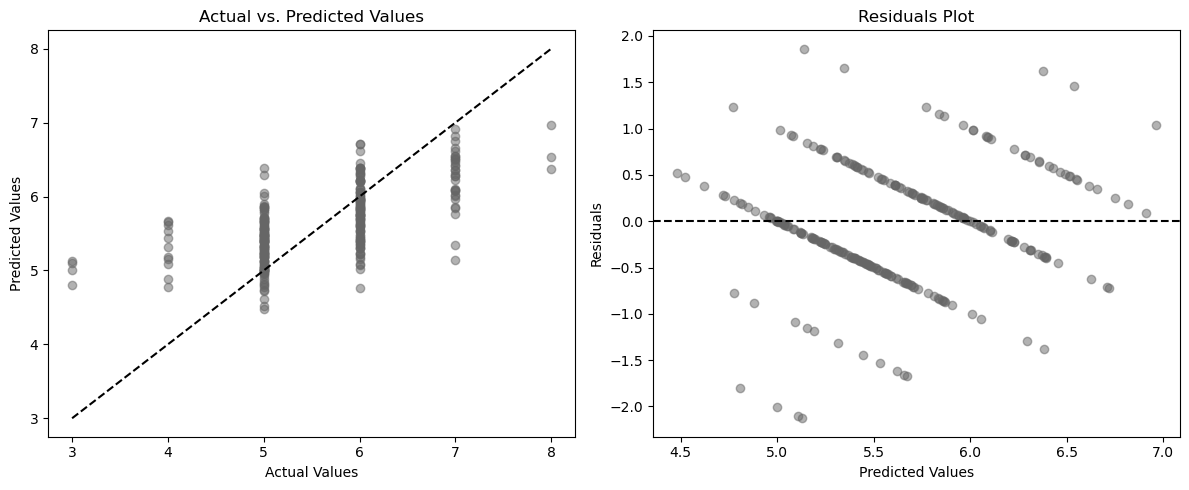

In [113]:
evaluate_linear_model(
    model=quality_model_final,
    X_test=X_quality_test_final_scaled,
    y_test=y_quality_test_final
)

To thoroughly assess the differences in performance of our model and ensure its robustness across different subsets of data, a cross-validation with 10 folds will be conducted. For this reason, to maintain consistency and prevent data leakage across folds, a pipeline will be used for systematically applying StandardScaler and fitting the LinearRegression model on the training dataset within each fold.

In [114]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

quality_scores_final = cross_val_score(
    estimator=pipeline,
    X=X_quality_final,
    y=y_quality_final,
    cv=10,
    scoring='r2'
)

In [115]:
print(
    f"R-squared scores for each fold: \n {quality_scores_final}\n\n"
    f"Average R-squared across all folds: {quality_scores_final.mean()}"
)

R-squared scores for each fold: 
 [-0.05478807  0.38512975  0.27966393  0.40366054 -0.04373605  0.40189061
  0.32507311  0.45751047  0.26566347  0.32531261]

Average R-squared across all folds: 0.2745380372884046


To understanding the relative influence of each predictor on the response variable, enabling more informed decisions regarding impact assessment in the predictive model, a coefficient values of the features in the model are calclulated.

In [116]:
quality_feature_importance = model_feature_importance(
    model=quality_model_final,
    X=X_quality_final
)

quality_feature_importance

Coefficient  Abs_Coefficient
alcohol                  0.305252         0.305252
sulphates                0.189434         0.189434
volatile_acidity        -0.173128         0.173128
pH                      -0.110010         0.110010
chlorides               -0.085202         0.085202
total_sulfur_dioxide    -0.064423         0.064423
citric_acid             -0.062794         0.062794

To summarize the obtained results for the specific splitted datasets, key performance metrics describing the initial and final models are calculated and transferred to the model performace table:

In [117]:
quality_model_final_r2 = r2_score(y_quality_test_final, y_quality_pred_final)
quality_model_final_mse = mean_squared_error(y_quality_test_final, y_quality_pred_final)
quality_model_final_rmse = np.sqrt(quality_model_final_mse)

r2_difference = quality_model_final_r2 - quality_model_r2
mse_difference = quality_model_final_mse - quality_model_mse
rmse_difference = quality_model_final_rmse - quality_model_rmse
model_scores_difference = quality_scores_final.mean() - quality_model_scores.mean()

In [118]:
quality_model_performance = pd.DataFrame({
    "Model": ["Initial", "Final", "Model Differences"],
    "R-squared": [
        quality_model_r2,
        quality_model_final_r2,
        r2_difference
    ],
    "MSE": [
        quality_model_mse,
        quality_model_final_mse,
        mse_difference
    ],
    "RMSE": [
        quality_model_rmse,
        quality_model_final_rmse,
        rmse_difference
    ],
    "Avarage R-squared across 10 folds": [
        quality_model_scores.mean(),
        quality_scores_final.mean(),
        model_scores_difference
    ]
})

In [119]:
quality_model_performance.set_index('Model', inplace=True)
quality_model_performance

R-squared       MSE      RMSE  \
Model                                              
Initial             0.416090  0.413616  0.643130   
Final               0.418024  0.412246  0.642064   
Model Differences   0.001934 -0.001370 -0.001066   

                   Avarage R-squared across 10 folds  
Model                                                 
Initial                                     0.271625  
Final                                       0.274538  
Model Differences                           0.002913

__Conclution__: The updated model summary shows a slight improvement in R-squared by approximately 0.19%, which indicates a minor enhancement in the model's ability to explain the variability of the target variable. However, the mean squared error (MSE) has decreased marginally, suggesting a small improvement in the model's prediction accuracy. Additionally, the average R-squared across 10 folds has increased by about 0.29%, pointing towards an increment in model consistency across different data subsets.

## Alcohol Content Prediction Model Development

Following the comprehensive data preparation phase, which included handling missing values, eliminating duplicates, and adjusting for skewness, the next step is the development of a linear regression model. This process is supported by careful selection of features, guided by correlation analysis and hypothesis testing, to enhance the model's accuracy and reliability.

### Data Splitting

In this section, __X_alcohol__ and __y_alcohol__ are defined as the feature set and target variable, respectively, for the alcohol content prediction model. These datasets are then split into training and testing sets. This step is a important to train the model and assess its performance effectively, ensuring its ability to generalize to unseen data.

__Note__: The dataset is sufficiently large but not excessively so, a split ratio of __80%__ for training and __20%__ for testing has been chosen.

In [120]:
X_alcohol = df_alcohol_transformed[alcohol_predictor_variables]
y_alcohol = df_alcohol_transformed['alcohol']

X_alcohol_train, X_alcohol_test, y_alcohol_train, y_alcohol_test = train_test_split(
    X_alcohol, y_alcohol, test_size=0.2, random_state=42
)

In [121]:
print(
    f"In the following analysis, after splitting the entire dataset of wine samples, "
    f"{X_alcohol_train.shape[0]} samples will be used for training the model, "
    f"while {X_alcohol_test.shape[0]} samples will be reserved for model testing."
)

In the following analysis, after splitting the entire dataset of wine samples, 1087 samples will be used for training the model, while 272 samples will be reserved for model testing.


### Model Initialization and Training

A LinearRegression model is created and trained on the dataset using training predictor and target variables to learn their relationship.

In [122]:
alcohol_model = LinearRegression()
alcohol_model.fit(X_alcohol_train, y_alcohol_train)

LinearRegression()

### Model Evaluation

In this section, the predictive accuracy of the linear regression model is assessed using key performance metrics and diagnostic plots. The Mean Squared Error (__MSE__) and Root Mean Squared Error (__RMSE__) reflect the average magnitude of the errors, while the __R-squared__ value measures how much variance in the target variable the model accounts for.

Mean Squared Error (MSE): 0.476792059174571
Root Mean Squared Error (RMSE): 0.690501310045514
R-squared (R2): 0.5625868186549963


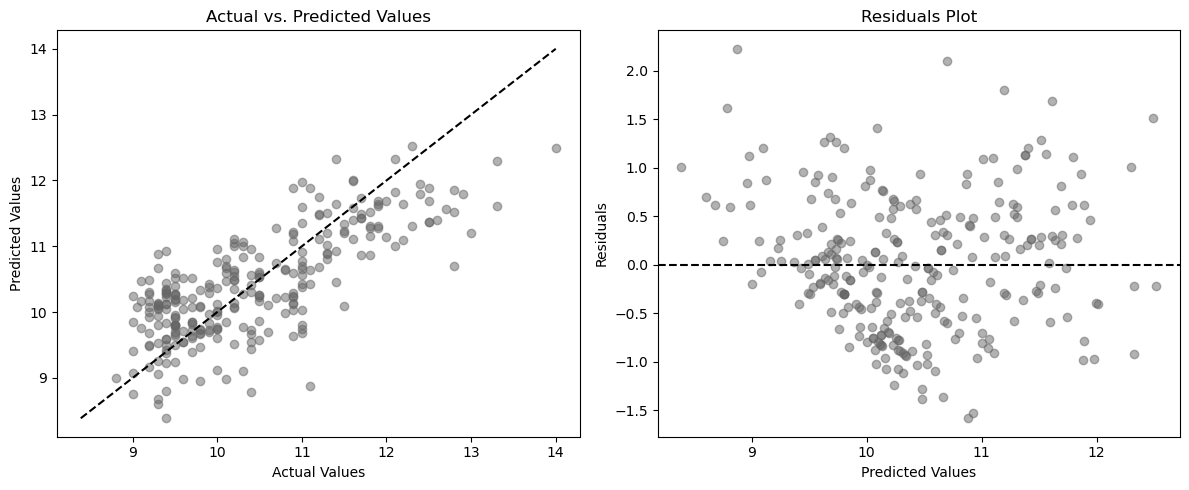

In [123]:
evaluate_linear_model(
    model=alcohol_model, 
    X_test=X_alcohol_test,
    y_test=y_alcohol_test
)

To thoroughly assess the performance of our model and ensure its robustness across different subsets of data, a cross-validation with 10 folds will be conducted. This method partitions the dataset into 10 distinct training and testing sets, allowing to evaluate the model's effectiveness using the coefficient of determination (R-squared) as the criterion. By averaging the scores obtained from each fold, a comprehensive understanding of the model's predictive accuracy will be gained.

In [124]:
alcohol_model_scores = cross_val_score(
    estimator=alcohol_model,
    X=X_alcohol,
    y=y_alcohol,
    cv=10,
    scoring='r2'
)

In [125]:
print(
    f"R-squared scores for each fold: \n {alcohol_model_scores}\n\n"
    f"Average R-squared across all folds: {alcohol_model_scores.mean()}"
)

R-squared scores for each fold: 
 [0.16047411 0.12386498 0.33282903 0.39933277 0.23720409 0.67304138
 0.65398742 0.68667885 0.60061984 0.54340295]

Average R-squared across all folds: 0.4411435429250103


* __Analytical observations of model performance__:
* The R-squared value of 0.56, suggesting that approximately __56%__ of the variance in the target variable is captured by the model.
* After cross-validation with 10 folds, the mean accuracy of the model decreases significantly to approximately __44%__. This reduction may indicate overfitting, suggesting the model could be too complex, or that data variability introduces excessive noise, affecting the model's generalizability.
* The Residuals Plot displays a spread of residuals that do not show a clear pattern, suggesting the model errors are fairly random.

Model results are saved for comparison of subsequent versions:

In [126]:
y_alcohol_pred = alcohol_model.predict(X_alcohol_test)
alcohol_model_r2 = r2_score(y_alcohol_test, y_alcohol_pred)
alcohol_model_mse = mean_squared_error(y_alcohol_test, y_alcohol_pred)
alcohol_model_rmse = np.sqrt(alcohol_model_mse)

In [127]:
alcohol_model_summary = pd.DataFrame({
    "Version": ["0"],
    "Description": ["Initial model"],
    "R-squared": [alcohol_model_r2],
    "Difference": [0.0]
})

### Model Refinement

After initially employing LinearRegression for predictive insights, a deeper statistical analysis will be conducted using a statsmodels __OLS__ (Ordinary Least Squares) Regression model. This method will reveal more detailed statistical information about the predictors, thereby aiding in the development of an improved model designed to yield better outcomes through a more informed selection and refinement of features.

__Note__:  Results from statsmodels' OLS (Ordinary Least Squares) and scikit-learn's LinearRegression can slightly differ, due to differences in the default handling of the intercept, variations in the underlying numerical algorithms, discrepancies in data preprocessing steps.

In [128]:
X_alcohol_const = sm.add_constant(X_alcohol_train)
alcohol_model_ols = sm.OLS(y_alcohol_train, X_alcohol_const).fit()

The new model will be evaluated using the test dataset, consisting of previously unseen data, and the R-squared, Mean Squared Error and Mean Absolute Error values will be calculated to assess the model's predictive accuracy for test dataset.

In [129]:
X_alcohol_test_const = sm.add_constant(X_alcohol_test)
y_alcohol_pred_test = alcohol_model_ols.predict(X_alcohol_test_const)

mse_test_alcohol = mean_squared_error(y_alcohol_test, y_alcohol_pred_test)
rmse_test_alcohol = np.sqrt(mse_test_alcohol)
r2_test_alcohol = r2_score(y_alcohol_test, y_alcohol_pred_test)

In [130]:
print(
    f'Parameters defining the accuracy of the Alcohol content Prediction Model : \n '
    f'Mean Squared Error (MSE): {mse_test_alcohol}  \n '
    f'Root Mean Squared Error (RMSE): {rmse_test_alcohol}\n '
    f'R-squared (R2): {r2_test_alcohol}'
)

Parameters defining the accuracy of the Alcohol content Prediction Model : 
 Mean Squared Error (MSE): 0.4767920591745205  
 Root Mean Squared Error (RMSE): 0.6905013100454774
 R-squared (R2): 0.5625868186550425


In [131]:
alcohol_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     196.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          9.36e-205
Time:                        22:00:59   Log-Likelihood:                -1147.5
No. Observations:                1087   AIC:                             2313.
Df Residuals:                    1078   BIC:                             2358.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  402.9702     14.691     27.430      0.000     374.144     431.796
volatile_acidity         0.3863      0.154      2.504      0.012       0.084       0.689
citric_acid              2.0040      0.163     12.264      0.000       1.683       2.325
residual_sugar           0.4209      0.024     17.572      0.000       0.374       0.468
chlorides               -0.1647      0.024     -6.792      0.000      -0.212      -0.117
total_sulfur_dioxide    -0.2621      0.021    -12.230      0.000      -0.304      -0.220
density               -398.1605     14.657    -27.165      0.000    -426.921    -369.400
pH                       1.0754      0.175      6.133      0.000       0.731       1.419
sulphates                0.2353      0.024      9.985      0.000       0.189       0.282
==============================================================================
Omnibus:                      129.372   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.677
Skew:                           0.740   Prob(JB):                     1.65e-54
Kurtosis:                       4.810   Cond. No.                     3.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Analytical observations and steps for improvement__:

1. __Normalize Data__: Apply StandardScaler() to ensure uniform feature scaling.
2. __Identification and Removal of Outliers__:  Employ Z-score method to detect and exclude potential outliers from the dataset.
3. __Default Feature Baseline Model__: Construct a baseline model using the default set of features (with no eliminations) to establish a reference point.

#### Feature Scaling

The _StandardScaler()_ will be applied to ensure uniform feature scaling, and a new version of the model, referred to as __v1__, will be developed.

First, variables for model are defined and splitted into training and testing sets:

In [132]:
X_alcohol_v1 = df_alcohol_transformed[alcohol_predictor_variables]
y_alcohol_v1 = df_alcohol_transformed['alcohol']

X_alcohol_train_v1, X_alcohol_test_v1, y_alcohol_train_v1, y_alcohol_test_v1 = (
    train_test_split(X_alcohol_v1, y_alcohol_v1, test_size=0.2, random_state=42)
)

Second, StandardScaler is initialized and fitted and transformed the training data as well as and test sets:

In [133]:
scaler = StandardScaler()

X_alcohol_train_v1_scaled = scaler.fit_transform(X_alcohol_train_v1)
X_alcohol_test_v1_scaled = scaler.transform(X_alcohol_test_v1)

Third, the new version of model is developed and key performance metrics are calculated:

In [134]:
alcohol_model_v1 = LinearRegression()
alcohol_model_v1.fit(X_alcohol_train_v1_scaled, y_alcohol_train_v1)

y_alcohol_pred_v1 = alcohol_model_v1.predict(X_alcohol_test_v1_scaled)
alcohol_model_v1_r2 = r2_score(y_alcohol_test_v1, y_alcohol_pred_v1)

In [135]:
alcohol_model_v1_r2_diff = alcohol_model_v1_r2 - alcohol_model_r2

In [136]:
alcohol_model_v1_summary = pd.DataFrame({
    "Version": ["1"],
    "Description": ["Model with Standard Scaling"],
    "R-squared": [alcohol_model_v1_r2],
    "Difference": [alcohol_model_v1_r2_diff]
})

In [137]:
alcohol_model_summary = pd.concat(
    [alcohol_model_summary, alcohol_model_v1_summary],
    ignore_index=True
)

In [138]:
print(f"After applying StandardScaler() to ensure uniform feature scaling ,"
      f"the recalculated R-squared difference is {alcohol_model_v1_r2_diff}. ")

After applying StandardScaler() to ensure uniform feature scaling ,the recalculated R-squared difference is 7.771561172376096e-15. 


__Conclution__: The implementation of StandardScaler for uniform feature scaling has maintained the model's explanatory power, with the minor difference in R-squared suggesting minor impact on predictive accuracy. 

#### Identification and Removal of Outliers

In this section, the Z-score method will be used to detect and exclude outliers from the dataset. By establishing a threshold value (chosen as 3), observations with a Z-score exceeding this limit will be evaluated and classified as outliers. This statistical measure calculates the number of standard deviations each observation is from the mean, and those significantly distant from the mean are removed, allowing for the refinement of the model with more representative data.

In [139]:
df_cleaned = remove_outliers(
    data_frame=df.drop(['quality','alcohol'], axis=1),
    threshold=3
)

df_cleaned['alcohol'] = df['alcohol']

In [140]:
print(f"After applying the Z-score method, {df_cleaned.shape[0]} samples remianed out of {df.shape[0]}.") 

After applying the Z-score method, 1243 samples remianed out of 1359.


After removal of potential outliers, variables for model are defined and splitted into training and testing sets:

In [141]:
X_alcohol_v2 = df_cleaned[alcohol_predictor_variables]
y_alcohol_v2 = df_cleaned['alcohol']

X_alcohol_train_v2, X_alcohol_test_v2, y_alcohol_train_v2, y_alcohol_test_v2 = train_test_split(
    X_alcohol_v2, y_alcohol_v2, test_size=0.2, random_state=42
)

A new version of model is developed and key performance metrics are calculated:

In [142]:
alcohol_model_v2 = LinearRegression()
alcohol_model_v2.fit(X_alcohol_train_v2, y_alcohol_train_v2)

y_alcohol_pred_v2 = alcohol_model_v2.predict(X_alcohol_test_v2)
alcohol_model_v2_r2 = r2_score(y_alcohol_test_v2, y_alcohol_pred_v2)

In [143]:
alcohol_model_v2_r2_diff = alcohol_model_v2_r2 - alcohol_model_r2

In [144]:
print(f"After removing potential outliers, the recalculated R-squared difference is {alcohol_model_v2_r2_diff}. ")

After removing potential outliers, the recalculated R-squared difference is -0.03972890949639085. 


In [145]:
Alcohol_model_v2_summary = pd.DataFrame({
    "Version": ["2"],
    "Description": ["Model with Potential Outliers Removed"],
    "R-squared": [alcohol_model_v2_r2],
    "Difference": [alcohol_model_v2_r2_diff]
})

In [146]:
alcohol_model_summary = pd.concat(
    [alcohol_model_summary, Alcohol_model_v2_summary],
    ignore_index=True
)

__Conclution__: The use of Z-score method for identifying and eliminating potential outliers from the dataset has led to a reduction in the model's explanatory power. This suggests that it has unintentionally removed information that was valuable for predicting the target variable. 

#### Default Feature Baseline Model

In this section a baseline model using the default set of features (with no eliminations) will be constructed and will serve as a benchmark to assess the impact of feature selection and other preprocessing steps on predictive performance. It will also allow for the evaluation of how each feature, regardless of its individual correlation with the target, contributes to the collective predictive accuracy.

__Notes__: 
* Even predictors with weak Pearson correlation coefficients to the target variable, like "_fixed_acidity_" to "_alcohol_," may hold latent value, potentially enhancing model accuracy through non-linear relationships or interactions with other variables. While highly correlated features often risk multicollinearity, they may explain unique variance in the target.
* Moreover, there exists a risk of committing a Type I error in hypothesis testing, where a potentially significant predictor is overlooked by failing to reject the null hypothesis. 

In [147]:
X_alcohol_v3 = df_alcohol_transformed.drop('alcohol', axis=1)
y_alcohol_v3 = df_alcohol_transformed['alcohol']

X_alcohol_train_v3, X_alcohol_test_v3, y_alcohol_train_v3, y_alcohol_test_v3 = train_test_split(
    X_alcohol_v3, y_alcohol_v3, test_size=0.2, random_state=42
)

In [148]:
X_alcohol_train_const_v3 = sm.add_constant(X_alcohol_train_v3)

alcohol_model_ols_v3 = sm.OLS(y_alcohol_train_v3, X_alcohol_train_const_v3).fit()
alcohol_model_ols_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     287.7
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          9.26e-296
Time:                        22:00:59   Log-Likelihood:                -929.69
No. Observations:                1087   AIC:                             1881.
Df Residuals:                    1076   BIC:                             1936.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  635.1757     15.873     40.015      0.000     604.029     666.322
fixed_acidity            0.5080      0.022     22.816      0.000       0.464       0.552
volatile_acidity         0.2127      0.128      1.660      0.097      -0.039       0.464
citric_acid              0.6120      0.149      4.111      0.000       0.320       0.904
residual_sugar           0.4649      0.020     23.572      0.000       0.426       0.504
chlorides               -0.0347      0.021     -1.679      0.093      -0.075       0.006
free_sulfur_dioxide      0.0037      0.030      0.126      0.900      -0.054       0.062
total_sulfur_dioxide    -0.1131      0.031     -3.702      0.000      -0.173      -0.053
density               -642.3251     16.201    -39.646      0.000    -674.115    -610.535
pH                       3.3137      0.175     18.944      0.000       2.970       3.657
sulphates                0.2265      0.019     11.692      0.000       0.188       0.264
==============================================================================
Omnibus:                      116.754   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.351
Skew:                           0.617   Prob(JB):                     1.97e-59
Kurtosis:                       5.108   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the OLS regression results summary, some features can be noticed with a p-value higher than 0.05, it may indicate that there is not a statistically significant relationship between those features and the target variable—at least within the context of the model. Also, these
features might have a high p-value due to multicollinearity with other features, which can have an effect on large condition number.

In [149]:
alcohol_model_v3 = LinearRegression()
alcohol_model_v3.fit(X_alcohol_train_v3, y_alcohol_train_v3)

y_alcohol_pred_v3 = alcohol_model_v3.predict(X_alcohol_test_v3)
alcohol_model_v3_r2 = r2_score(y_alcohol_test_v3, y_alcohol_pred_v3)

In [150]:
alcohol_model_v3_r2_diff = alcohol_model_v3_r2 - alcohol_model_r2

In [151]:
alcohol_model_v3_summary = pd.DataFrame({
    "Version": ["3"],
    "Description": ["Default Feature Baseline Model"],
    "R-squared": [alcohol_model_v3_r2],
    "Difference": [alcohol_model_v3_r2_diff]
})

In [152]:
print(f"After rounding prediction, the recalculated R-squared difference is {alcohol_model_v3_r2_diff}. ")

After rounding prediction, the recalculated R-squared difference is 0.14227312858130747. 


In the next step, an attempt will be made to improve the model by removing features of questionable benefit.

In [153]:
alcohol_non_significant_features = ['volatile_acidity',
                                    'chlorides',
                                    'free_sulfur_dioxide'
                                   ]

Accordingly, a model version 4 will be updated by removing non significant features accordingly.

In [154]:
X_alcohol_v4 = X_alcohol_v3.drop(alcohol_non_significant_features, axis=1)
y_alcohol_v4 = df_alcohol_transformed['alcohol']

X_alcohol_train_v4, X_alcohol_test_v4, y_alcohol_train_v4, y_alcohol_test_v4 = train_test_split(
    X_alcohol_v4, y_alcohol_v4, test_size=0.2, random_state=42
)

X_alcohol_train_const_v4 = sm.add_constant(X_alcohol_train_v4)

alcohol_model_ols_v4 = sm.OLS(y_alcohol_train_v4, X_alcohol_train_const_v4).fit()
alcohol_model_ols_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     409.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.17e-298
Time:                        22:00:59   Log-Likelihood:                -931.98
No. Observations:                1087   AIC:                             1880.
Df Residuals:                    1079   BIC:                             1920.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  641.6174     14.281     44.928      0.000     613.596     669.639
fixed_acidity            0.5184      0.021     24.400      0.000       0.477       0.560
citric_acid              0.4904      0.130      3.782      0.000       0.236       0.745
residual_sugar           0.4673      0.020     23.726      0.000       0.429       0.506
total_sulfur_dioxide    -0.1059      0.019     -5.674      0.000      -0.143      -0.069
density               -649.0197     14.517    -44.709      0.000    -677.504    -620.536
pH                       3.4010      0.165     20.575      0.000       3.077       3.725
sulphates                0.2174      0.019     11.561      0.000       0.180       0.254
==============================================================================
Omnibus:                      121.861   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.820
Skew:                           0.637   Prob(JB):                     5.22e-63
Kurtosis:                       5.171   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
alcohol_model_v4 = LinearRegression()
alcohol_model_v4.fit(X_alcohol_train_v4, y_alcohol_train_v4)

y_alcohol_pred_v4 = alcohol_model_v4.predict(X_alcohol_test_v4)
alcohol_model_v4_r2 = r2_score(y_alcohol_test_v4, y_alcohol_pred_v4)

In [156]:
alcohol_model_v4_r2_diff = alcohol_model_v4_r2 - alcohol_model_r2

In [157]:
alcohol_model_v4_summary = pd.DataFrame({
    "Version": ["4"],
    "Description": ["Baseline Model (v4) with Significant Features"],
    "R-squared": [alcohol_model_v4_r2],
    "Difference": [alcohol_model_v4_r2_diff]
})

In [158]:
alcohol_model_summary = pd.concat(
    [alcohol_model_summary, alcohol_model_v3_summary, alcohol_model_v4_summary],
    ignore_index=True
)

In [159]:
print(f"After rounding prediction, the recalculated R-squared difference is {alcohol_model_v4_r2_diff}. ")

After rounding prediction, the recalculated R-squared difference is 0.13997910042734096. 


__Conclution__: 
* The baseline model shows a notable improvement in prediction accuracy with an R-squared difference of approximately 0.1422. Despite this improvement, the potential for increased noise and multicollinearity must be considered, as suggested by a large condition number in the OLS summary, which could compromise the model's reliability and interpretability.
* Removing statistically non-significant features, as the OLS summary suggests, also results in an increase, although smaller, in the model's performance, with an R-squared difference of 0.1399 compared to the initial model. However, a large condition number may indicate the presence of strong multicollinearity or other numerical issues in the model.

### Final Alcohol Content Prediction Model

In this section model's various versions will be reviewed, with a focus on R-squared values to measure improvements. According to the difference of R-squared value with the initial version of the model, what improvements will be used in finalizing the model will be chosen.

In [160]:
alcohol_model_summary

Version                                    Description  R-squared  \
0       0                                  Initial model   0.562587   
1       1                    Model with Standard Scaling   0.562587   
2       2          Model with Potential Outliers Removed   0.522858   
3       3                 Default Feature Baseline Model   0.704860   
4       4  Baseline Model (v4) with Significant Features   0.702566   

     Difference  
0  0.000000e+00  
1  7.771561e-15  
2 -3.972891e-02  
3  1.422731e-01  
4  1.399791e-01

Based on the summary table, it is seen that the third version (v3) of the model displayed the the most improved R-squared value. However, the decision to proceed with the fourth version (__v4__) as the final model is made because it simplifies the complexity by excluding statistically non-significant features. Although, v4 still presents a high condition number, suggesting potential multicollinearity or numerical issues, the incorporation of __StandardScaler__ is expected to help reduce these risks and positively influence the model's robustness.

For these reasons, the final model is created by combining the 1st and 4th tested model refinement variants.

Features for alcohol content prediction model are updated as a seperate final list of features:

In [161]:
alcohol_excluded_features_final = alcohol_non_significant_features + ['alcohol', 'quality']

final_alcohol_predictor_variables = [
    feature for feature in all_features if feature not in alcohol_excluded_features_final
]

Variables for final model are defined and splitted into training and testing sets:

In [162]:
X_alcohol_final = df_alcohol_transformed[final_alcohol_predictor_variables]
y_alcohol_final = df_alcohol_transformed['alcohol']

X_alcohol_train_final, X_alcohol_test_final, y_alcohol_train_final, y_alcohol_test_final = (
    train_test_split(X_alcohol_final, y_alcohol_final, test_size=0.2, random_state=42)
)

StandardScaler is initialized and fitted and transformed the training data as well as and test sets:

In [163]:
scaler = StandardScaler()

X_alcohol_train_final_scaled = scaler.fit_transform(X_alcohol_train_final)
X_alcohol_test_final_scaled = scaler.transform(X_alcohol_test_final)

After applying scaling, the original feature names are returned: 

In [164]:
X_alcohol_train_final_scaled = pd.DataFrame(
    X_alcohol_train_final_scaled,
    columns=final_alcohol_predictor_variables,
    index=X_alcohol_train_final.index
)

X_alcohol_test_final_scaled = pd.DataFrame(
    X_alcohol_test_final_scaled,
    columns=final_alcohol_predictor_variables,
    index=X_alcohol_test_final.index
)

To evaluate the condition number, the OLS model is recreated and its summary is re-examined.

In [165]:
X_alcohol_final_const = sm.add_constant(X_alcohol_train_final_scaled)
alcohol_model_final_ols = sm.OLS(y_alcohol_train_final, X_alcohol_final_const).fit()
alcohol_model_final_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     409.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          1.17e-298
Time:                        22:00:59   Log-Likelihood:                -931.98
No. Observations:                1087   AIC:                             1880.
Df Residuals:                    1079   BIC:                             1920.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4355      0.017    601.039      0.000      10.401      10.470
fixed_acidity            0.8944      0.037     24.400      0.000       0.822       0.966
citric_acid              0.0958      0.025      3.782      0.000       0.046       0.145
residual_sugar           0.4592      0.019     23.726      0.000       0.421       0.497
total_sulfur_dioxide    -0.1063      0.019     -5.674      0.000      -0.143      -0.070
density                 -1.2088      0.027    -44.709      0.000      -1.262      -1.156
pH                       0.5176      0.025     20.575      0.000       0.468       0.567
sulphates                0.2176      0.019     11.561      0.000       0.181       0.255
==============================================================================
Omnibus:                      121.861   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.820
Skew:                           0.637   Prob(JB):                     5.22e-63
Kurtosis:                       5.171   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A final version of model is developed and key performance metrics are calculated:

In [166]:
alcohol_model_final = LinearRegression()
alcohol_model_final.fit(X_alcohol_train_final_scaled, y_alcohol_train_final)

y_alcohol_pred_final = alcohol_model_final.predict(X_alcohol_test_final_scaled)
alcohol_model_final_r2 = r2_score(y_alcohol_test_final, y_alcohol_pred_final)

Mean Squared Error (MSE): 0.3242110982420911
Root Mean Squared Error (RMSE): 0.5693953795405184
R-squared (R2): 0.7025659190823326


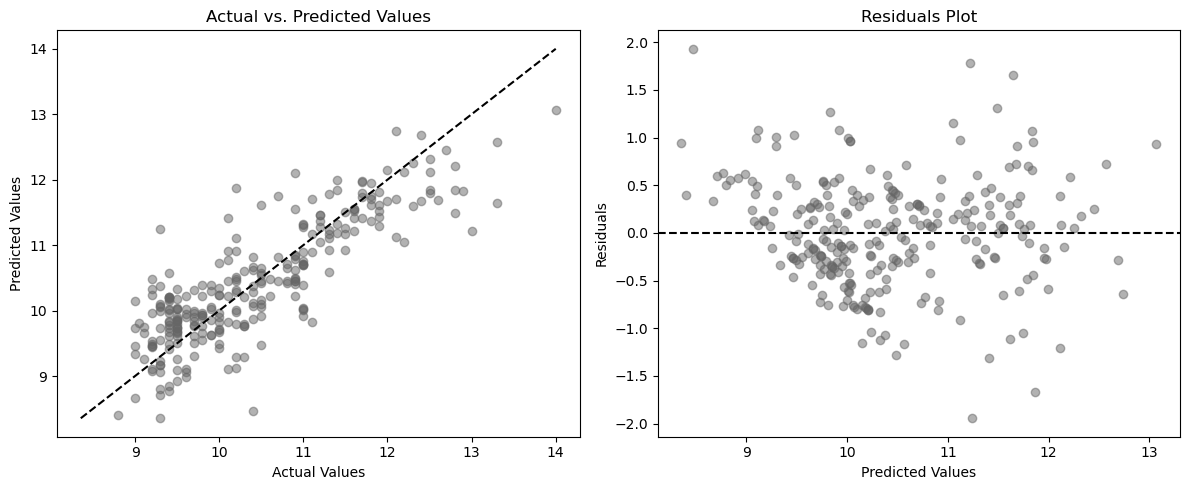

In [167]:
evaluate_linear_model(
    model=alcohol_model_final,
    X_test=X_alcohol_test_final_scaled,
    y_test=y_alcohol_test_final
)

To thoroughly assess the differences in performance of our model and ensure its robustness across different subsets of data, a cross-validation with 10 folds will be conducted. For this reason, to maintain consistency and prevent data leakage across folds, a pipeline will be used for systematically applying StandardScaler and fitting the LinearRegression model on the training dataset within each fold.

In [168]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

alcohol_scores_final = cross_val_score(
    estimator=pipeline,
    X=X_alcohol_final,
    y=y_alcohol_final,
    cv=10,
    scoring='r2'
)

In [169]:
print(
    f"R-squared scores for each fold: \n {alcohol_scores_final}\n\n"
    f"Average R-squared across all folds: {alcohol_scores_final.mean()}"
)

R-squared scores for each fold: 
 [0.56472223 0.23984066 0.5601014  0.5650696  0.48844079 0.7998718
 0.79052589 0.79778373 0.74292411 0.76653206]

Average R-squared across all folds: 0.6315812265409788


To understanding the relative influence of each predictor on the response variable, enabling more informed decisions regarding impact assessment in the predictive model, a coefficient values of the features in the model are calclulated.

In [170]:
alcohol_feature_importance = model_feature_importance(
    model=alcohol_model_final,
    X=X_alcohol_final
)

alcohol_feature_importance

Coefficient  Abs_Coefficient
density                 -1.208761         1.208761
fixed_acidity            0.894357         0.894357
pH                       0.517572         0.517572
residual_sugar           0.459248         0.459248
sulphates                0.217627         0.217627
total_sulfur_dioxide    -0.106288         0.106288
citric_acid              0.095773         0.095773

To summarize the obtained results for the specific splitted datasets, key performance metrics describing the initial and final models are calculated and transferred to the model performace table:

In [171]:
alcohol_model_final_r2 = r2_score(y_alcohol_test_final, y_alcohol_pred_final)
alcohol_model_final_mse = mean_squared_error(y_alcohol_test_final, y_alcohol_pred_final)
alcohol_model_final_rmse = np.sqrt(alcohol_model_final_mse)

alcohol_r2_difference = alcohol_model_final_r2 - alcohol_model_r2
alcohol_mse_difference = alcohol_model_final_mse - alcohol_model_mse
alcohol_rmse_difference = alcohol_model_final_rmse - alcohol_model_rmse
alcohol_model_scores_difference = alcohol_scores_final.mean() - alcohol_model_scores.mean()

In [172]:
alcohol_model_performance = pd.DataFrame({
    "Model": ["Initial", "Final", "Model Differences"],
    "R-squared": [
        alcohol_model_r2,
        alcohol_model_final_r2,
        alcohol_r2_difference
    ],
    "MSE": [
        alcohol_model_mse,
        alcohol_model_final_mse,
        alcohol_mse_difference
    ],
    "RMSE": [
        alcohol_model_rmse,
        alcohol_model_final_rmse,
        alcohol_rmse_difference
    ],
    "Avarage R-squared across 10 folds": [
        alcohol_model_scores.mean(),
        alcohol_scores_final.mean(),
        alcohol_model_scores_difference]
})

In [173]:
alcohol_model_performance.set_index('Model', inplace=True)
alcohol_model_performance

R-squared       MSE      RMSE  \
Model                                              
Initial             0.562587  0.476792  0.690501   
Final               0.702566  0.324211  0.569395   
Model Differences   0.139979 -0.152581 -0.121106   

                   Avarage R-squared across 10 folds  
Model                                                 
Initial                                     0.441144  
Final                                       0.631581  
Model Differences                           0.190438

__Conclution__: The updated model comparison highlights a substantial improvement in predictive performance. The R-squared increase of 0.14 from the initial to the final model indicates a marked enhancement in explanatory power. The decrease in Mean Squared Error (MSE) by 0.15 suggests improved prediction accuracy, and the notable increase in the average R-squared value across 10-fold cross-validation, from 0.44 to 0.63, points to greater consistency and potential reliability in the final model. This substantial increase suggests that the final model is likely to be more reliable and provide better generalization when applied to new data.

# Key Insights and Recommendations

## Wine Characteristics and Impact on Quality

Wines rated as __low quality__ tends to have __higher volatile acidity__, which may lead to a sharper and potentially less pleasant taste. Such wines might also exhibit __less citric acid__, which could result in a less fresh and less vibrant taste profile. Furthermore, they often have a __lower alcohol__ content, which could be associated with a lighter, less complex flavor experience.

Wines rated as __high quality__ tend to have a __higher level of alcohol__, suggesting a richer and more complex flavor profile. Furthermore, a _positive correlation between quality and alcohol_ , suggests that alcohol content is a strong predictor of quality. High quality wines also tend to have __higher citric acid__ content, which can be associated with a fresh and bright taste, and __lower density__, possibly indicating a more refined or elegant mouthfeel. However, _density feature was not included in the final predictive model_ due to potential multicollinearity issues arising from its correlation with other predictors.

In [174]:
print(
    f'Parameters indicative of high quality wines '
    f'(quality score {quality_threshold} and above):\n\n'
    f'{high_quality_wine_specs}'
)

Parameters indicative of high quality wines (quality score 6.0 and above):

                           Mean   Lower CI   Upper CI
fixed_acidity          8.820109   8.533348   9.106869
volatile_acidity       0.405870   0.385413   0.426326
citric_acid            0.372880   0.344953   0.400808
residual_sugar         2.703804   2.505021   2.902587
chlorides              0.076049   0.071703   0.080395
free_sulfur_dioxide   13.972826  12.486803  15.458849
total_sulfur_dioxide  35.358696  30.405014  40.312378
density                0.995963   0.995649   0.996277
pH                     3.288587   3.266257   3.310917
sulphates              0.745598   0.726247   0.764949
alcohol               11.552808  11.406544  11.699072


Knowing the parameters indicative of high-quality wines and their impact on taste can offer substantial business value:
* __Quality Control and Consistency__: The confidence intervals provide a guideline for acceptable ranges of each chemical component in the production process. Maintaining these levels within specified limits helps ensure consistent quality in each batch of wine produced.
* __Sourcing of Raw Materials__: This data can be used to make informed decisions about which grapes to plant and procure, focusing on those that are more likely to yield the desired chemical profile for high-quality wines.
* __Targeted Marketing and Product Positioning__: By understanding which chemical properties correlate with high-quality ratings, winemakers and marketers can emphasize these attributes in their branding and marketing strategies.

## Quality Prediction Model

The creation of the final quality prediction model involved a meticulous review of various modeling strategies, where it was identified that neither __resampling__ nor __removing outliers__ substantially improved the R-squared value. In fact, these methods resulted in a decline in explanatory power. However, the __removal of non-significant features__ did lead to a marginal increase in R-squared, suggesting a cleaner model with less noise.

Interestingly, while __the StandardScaler's application__ didn't enhance the R-squared value, it has the potential to create a more stable and consistent model, particularly beneficial for new, unseen data. Despite these efforts, the final model still exhibits relatively __low accuracy__, particularly in predicting very low or high quality wines. __This limitation highlights the potential need for a more complex model__, such as non-linear models, to capture the nuances in the data.

Additionally, the dataset's imbalance and the lack of sufficient samples at the extremes of the quality spectrum may also contribute to the difficulty in training a robust model. Expanding the dataset to include a broader range of low and high-quality wine samples could improve the model's learning process and its predictive accuracy.

### Building the Prediction Model

__Building the prediction model involved these essential stages__:
* The quality prediction model was developed using __LinearRegression()__, with the __Yeo-Johnson transformation__ applied to normalize the data and mitigate the effects of skewness on a model sensitive to non-normal distributions;
* Feature selection was based on __correlation analysis__ and __hypothesis testing__ to ensure only variables with significant impacts on quality were included.
* The __StandardScaler()__ was employed to scale the feature values, facilitating more effective modeling by standardizing the range of independent variables.
* Additionally, for a comprehensive statistical analysis, a statsmodels __OLS__ (Ordinary Least Squares) Regression model was utilized to evaluate the model's metrics and validate its predictive capability.

The effectiveness of model is quantified by several key metrics, including:
* __R-squared__,  which measures the proportion of variance in the dependent variable explained by the independent variables;
* __MSE__ (Mean Squared Error), indicating the average of the squares of the errors;
* __RMSE__ (Root Mean Squared Error), reflecting the standard deviation of the residuals;
* __Average R-squared across 10 folds__, which assesses the model’s stability and predictive power across different subsets of the dataset.

In [175]:
print(
    f"Final Quality Prediction Model's metrics:\n\n"
    f"    R-squared: {quality_model_final_r2}\n"
    f"    MSE: {quality_model_mse}\n"
    f"    RMSE: {quality_model_final_rmse}\n"
    f"    Average R-squared across 10 folds: {np.mean(quality_scores_final)}\n\n"
    f"Features included in the final model: {', '.join(updated_quality_predictor_variables)}."
)

Final Quality Prediction Model's metrics:

    R-squared: 0.418023898705176
    MSE: 0.41361579719657854
    RMSE: 0.6420640016034472
    Average R-squared across 10 folds: 0.2745380372884046

Features included in the final model: volatile_acidity, citric_acid, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol.


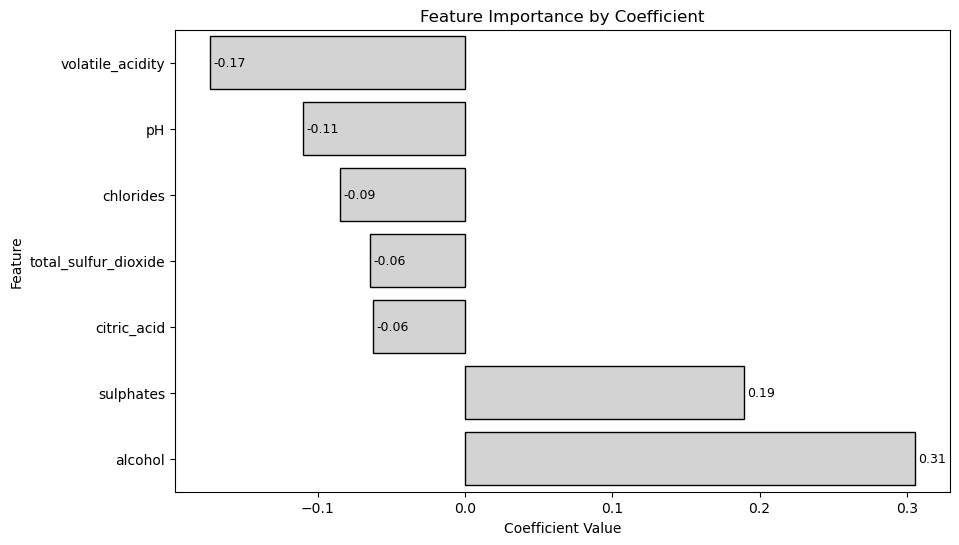

In [176]:
plot_feature_importances_horizontal(
    data_frame=quality_feature_importance,
    column='Coefficient'
)

In [177]:
print_confidence_interval_t(
    scores=quality_scores_final,
    alpha=0.95
)

With 95% confidence, the true prediction accuracy of the linear regression model for predicting wine target variable lies between 14.53% and 40.37%, based on current red wine dataset.


## Alcohol Content Prediction Model

The correlation analysis, regarding the alcohol content in wine, revealed that __alcohol__ content in wine has the highest correlation with __density__, indicating a strong inverse relationship where _wines with lower density often have higher alcohol levels_. Furthermore, __density__ itself is highly correlated with __fixed acidity__, and to a lesser extent, with __citric acid__ and __residual sugar__.

Although, __fixed acidity__, __citric acid__, and __residual sugar__ do not exhibit a direct strong correlation with __alcohol__, their significant interrelationships with __density__, a key predictor of alcohol content, imply that they may indirectly impact the prediction of alcohol levels.

Therefore, including these variables in the alcohol content prediction model showed an enhance in its accuracy. This indirect influence highlights the complexity of the relationships within the dataset and the importance of a holistic approach to feature selection in predictive modeling.

### Building the Prediction Model

__Building the prediction model involved these essential stages__:

* The alcohol content prediction model was developed using __LinearRegression()__, with the __Yeo-Johnson transformation__ applied to normalize the data and mitigate the effects of skewness on a model sensitive to non-normal distributions;
* The __StandardScaler()__ was employed to standardize the range of independent variables, enhancing the model's effectiveness.
* Employing a statsmodels __OLS__ (Ordinary Least Squares) Regression model offered an advanced statistical method to fine-tune feature selection and improve the accuracy for predicting alcohol content. 

In [178]:
print(
    f"Final Alcohol Content Prediction Model's metrics:\n\n"
    f"    R-squared: {alcohol_model_final_r2}\n"
    f"    MSE: {alcohol_model_mse}\n"
    f"    RMSE: {alcohol_model_final_rmse}\n"
    f"    Average R-squared across 10 folds: {np.mean(alcohol_scores_final)}\n\n"
    f"Features included in the final model: {', '.join(final_alcohol_predictor_variables)}."
)

Final Alcohol Content Prediction Model's metrics:

    R-squared: 0.7025659190823326
    MSE: 0.476792059174571
    RMSE: 0.5693953795405184
    Average R-squared across 10 folds: 0.6315812265409788

Features included in the final model: fixed_acidity, citric_acid, residual_sugar, total_sulfur_dioxide, density, pH, sulphates.


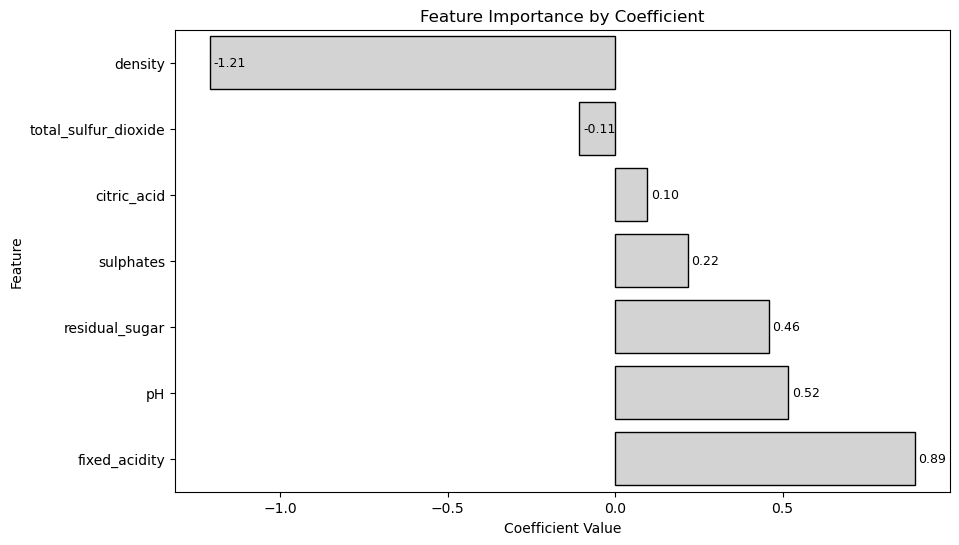

In [179]:
plot_feature_importances_horizontal(
    data_frame=alcohol_feature_importance,
    column='Coefficient'
)

In [180]:
print_confidence_interval_t(
    scores=alcohol_scores_final,
    alpha=0.95
)

With 95% confidence, the true prediction accuracy of the linear regression model for predicting wine target variable lies between 50.10% and 76.21%, based on current red wine dataset.


## Suggestions for Analysis Improvement

To enhance prediction accuracy and gain a deeper insight into the data, it is recommended to:
1. __Additional Normalization and Scaling Methods__: explore various normalization and scaling techniques beyond the used methods, assessing their impact on model performance to determine the most effective approach.
2. __Data Enrichment__: aim to collect a more robust and balanced dataset, especially targeting wine samples with extreme quality scores. This would help improve model training and testing, ensuring that all quality levels are adequately represented to prevent overfitting or underfitting.
3. __Diverse Modeling Techniques__: after finding out that the current model does not effectively predict wines with extremely low or high quality scores, it is worth considering to employ non-linear regression models, which may capture complex relationships in the data better.
4. __Classification Approach__: implement a classification model to categorize wines into binary or multiple quality groups (e.g., 'good' vs. 'bad' wine). This may yield more practical insights for certain applications.
5. __Alternative Regression Models for Alcohol Prediction__: test alternative regression models like Lasso or Ridge Regression for the alcohol prediction model. These models are designed to handle multicollinearity better by including penalty terms that can reduce the impact of less important features.
6. __Feature Engineering__: investigate the creation of new features from the existing data. Test these engineered features to evaluate their potential in enhancing the predictive power of the models.

The result of this exploratory analysis signifies an opportunity for refinement in wine production practices. Insights derived from the data provide a roadmap for enhancing wine characteristics that are most valued. It is necessary to consider the expansion of the current dataset prior to the implementation of production adjustments. For example, organizing structured wine tasting and evaluation events that involve the target demographic will yield additional data, ensuring that subsequent modifications to the production process are aligned with consumer preferences. This strategic approach is expected to augment the popularity and perceived value of the wine in question.

Google LookerStudio Dashboard : https://lookerstudio.google.com/s/ssU1VEdHCcI

Data used for dashboard:

In [181]:
quality_model_summary.to_csv('./quality_model_summary.csv', index=False)
alcohol_model_summary.to_csv('./alcohol_model_summary.csv', index=False)

In [182]:
alcohol_feature_importance.index.name = 'Feature_Name'

alcohol_feature_importance.to_csv(
    'alcohol_feature_importance.csv',
    index=True,
    index_label='Feature_Name'
)

In [183]:
quality_feature_importance.index.name = 'Feature_Name'

quality_feature_importance.to_csv(
    'quality_feature_importance.csv',
    index=True,
    index_label='Feature_Name'
)

In [184]:
alcohol_ci_df = create_confidence_interval_df_t(
    data_array=alcohol_scores_final,
    confidence_level=0.95
)

alcohol_ci_df.to_csv(
    'alcohol_ci_df.csv',
    index=False
)

In [185]:
quality_ci_df = create_confidence_interval_df_t(
    data_array=quality_scores_final,
    confidence_level=0.95
)

quality_ci_df.to_csv(
    'quality_ci_df.csv',
    index=False
)

In [186]:
quality_model_performance.to_csv(
    'quality_model_performance.csv',
    index=True
)

In [187]:
alcohol_model_performance.to_csv(
    'alcohol_model_performance.csv',
    index=True
)